### **Basic overview of the audio file:**

In [ ]:
!pip install numpy scipy matplotlib librosa PyWavelets pydub ffmpeg tabulate soundfile

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 45.2 MB/s eta 0:00:00
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=489cd16aa350f7510e26a01e71e06c01b2d336c36c3dbb0854311185371c8194
  Stored in directory: /root/.cache/pip/wheels/56/30/c5/576bdd729f3bc062d62a551be7fefd6ed2f761901568171e4e
Successfully built ffmpeg


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import butter, lfilter, wiener
from scipy.fft import fft, fftfreq
from pydub import AudioSegment
from tabulate import tabulate
import librosa
import librosa.display
from scipy.signal import find_peaks  # Assuming find_peaks is from scipy.signal
# import pywt  # If you plan to use PyWavelets directly, uncomment this line

In [ ]:
def load_audio(file_path):
    try:
        return AudioSegment.from_file(file_path)
    except Exception as e:
        print(f"Error loading file: {e}")
        return None

In [ ]:
def get_waveform(audio, channels):
    try:
        waveform = np.array(audio.get_array_of_samples())
        if channels == 2:
            waveform = waveform.reshape((-1, 2))
        return waveform
    except Exception as e:
        print(f"Error converting to waveform: {e}")
        return None

In [ ]:
def analyze_audio(audio):
    samples = np.array(audio.get_array_of_samples())
    samples = samples / np.max(np.abs(samples))

    fft_result = np.fft.fft(samples)
    freqs = np.fft.fftfreq(len(samples), 1 / audio.frame_rate)

    peaks, _ = find_peaks(samples)
    valleys, _ = find_peaks(-samples)

    positive_freqs = freqs[:len(freqs) // 2]
    magnitude = np.abs(fft_result[:len(freqs) // 2])
    dominant_freq = positive_freqs[np.argmax(magnitude)]

    return samples, peaks, valleys, positive_freqs, magnitude, dominant_freq

In [ ]:
def plot_audio_with_peaks_and_valleys(samples, peaks, valleys, audio):
    time = np.linspace(0, len(samples) / audio.frame_rate, num=len(samples))

    plt.figure(figsize=(12, 6))

    plt.scatter(time[peaks], samples[peaks], color='red', label="Peaks", s=1)
    plt.title("AUDIO SIGNAL WITH PEAKS")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (dB)")
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()

    plt.figure(figsize=(12, 6))

    plt.scatter(time[valleys], samples[valleys], color='green', label="Valleys", s=1)
    plt.title("AUDIO SIGNAL WITH VALLEYS")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (dB)")
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
def plot_frequency_spectrum(positive_freqs, magnitude):
    peak_index = np.argmax(magnitude)
    dominant_frequency = positive_freqs[peak_index]

    if dominant_frequency > 0:
        time_period = 1 / dominant_frequency
    else:
        time_period = None

    plt.figure(figsize=(12, 6))

    plt.plot(positive_freqs, magnitude, color="orange", label="Magnitude Spectrum")
    plt.title("FREQUENCY SPECTRUM")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude (dB)")
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

    if time_period:
        print(f"\nTime of Dominant Frequency: {time_period:.4f} seconds")
    else:
        print("No dominant frequency detected.")

In [ ]:
def plot_waveform(waveform, sample_rate, channels):
    try:
        time_axis = np.linspace(0, len(waveform) / sample_rate, num=len(waveform))

        plt.figure(figsize=(12, 6))

        if channels == 1:
            plt.plot(time_axis, waveform, label="Mono Channel")
        else:
            plt.plot(time_axis, waveform[:, 0], label="Left Channel")
            plt.plot(time_axis, waveform[:, 1], label="Right Channel")

        plt.title("WAVEFORM REPRESENTATION", loc='center')
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude (dB)")
        plt.tight_layout()
        plt.legend(loc='upper right')
        plt.grid()
        plt.show()

    except Exception as e:
        print(f"Error while plotting waveform: {e}")

In [ ]:
file_path = "/content/test.mp3"
audio = load_audio(file_path)

In [ ]:
if audio:
    audio_info = [
        ["Duration", f"{len(audio) / 1000:.2f} seconds"],
        ["Sample Rate", f"{audio.frame_rate} Hz"],
        ["Channels", f"{audio.channels} ({'Stereo' if audio.channels == 2 else 'Mono'})"],
        ["Sample Width", f"{audio.sample_width} bytes"],
        ["File Format", file_path.split('.')[-1]]
    ]

    print("Audio File Information:")
    print(tabulate(audio_info, headers=["Attribute", "Value"], tablefmt="grid"))

Audio File Information:
+--------------+---------------+
| Attribute    | Value         |
+==============+===============+
| Duration     | 15.68 seconds |
+--------------+---------------+
| Sample Rate  | 48000 Hz      |
+--------------+---------------+
| Channels     | 2 (Stereo)    |
+--------------+---------------+
| Sample Width | 2 bytes       |
+--------------+---------------+
| File Format  | mp3           |
+--------------+---------------+


In [ ]:
    waveform = get_waveform(audio, audio.channels)
    if waveform is not None:
      print("Waveform extracted successfully!")

Waveform extracted successfully!


In [ ]:
    print("Analyzing Audio...")

    samples, peaks, valleys, positive_freqs, magnitude, dominant_frequency = analyze_audio(audio)

Analyzing Audio...


In [ ]:
    frequency_info = [
        ["Number of Peaks", len(peaks)],
        ["Number of Valleys", len(valleys)],
        ["Dominant Frequency", f"{dominant_frequency:.2f} Hz"]
    ]

    print("Frequency Analysis:")
    print(tabulate(frequency_info, headers=["Attribute", "Value"], tablefmt="grid"))

Frequency Analysis:
+--------------------+----------+
| Attribute          | Value    |
+====================+==========+
| Number of Peaks    | 692592   |
+--------------------+----------+
| Number of Valleys  | 692591   |
+--------------------+----------+
| Dominant Frequency | 36.38 Hz |
+--------------------+----------+


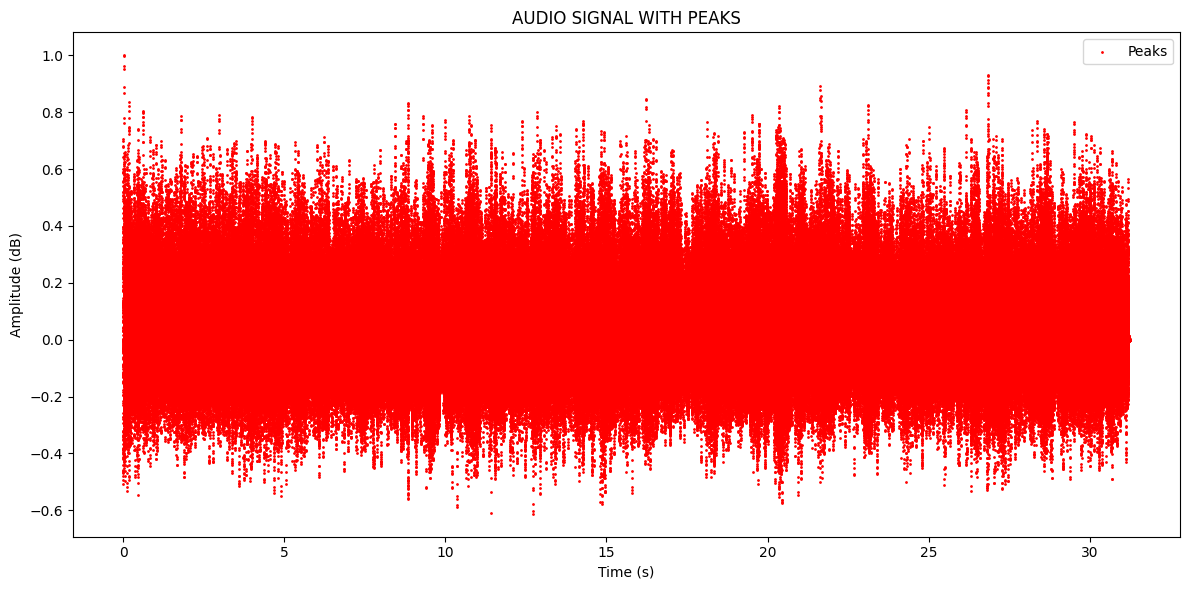

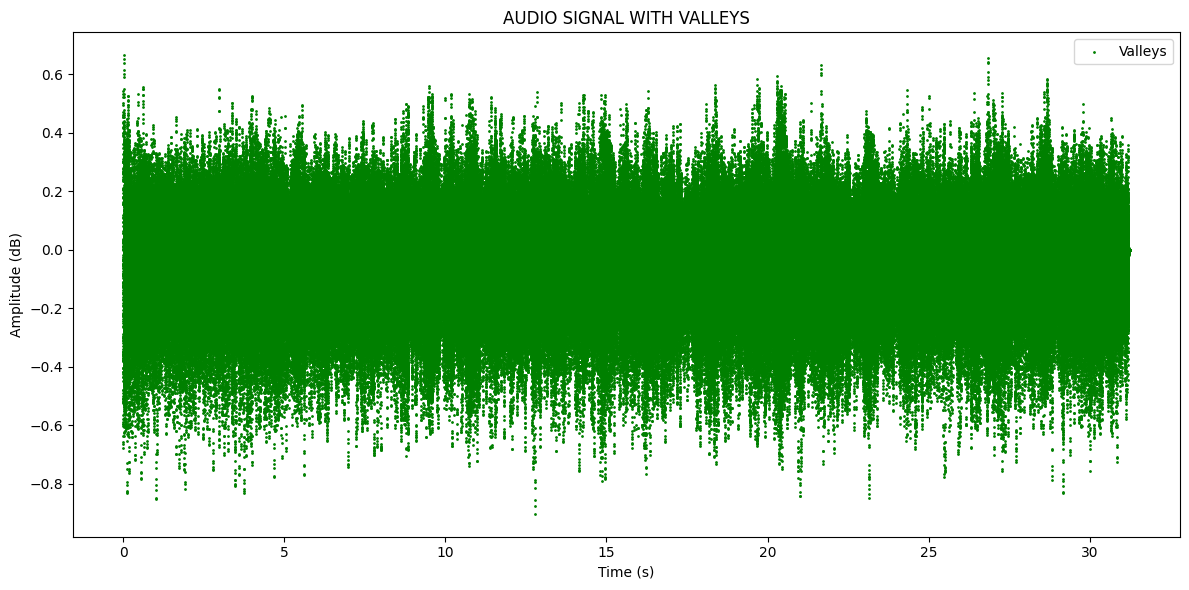

In [ ]:
    plot_audio_with_peaks_and_valleys(samples, peaks, valleys, audio)

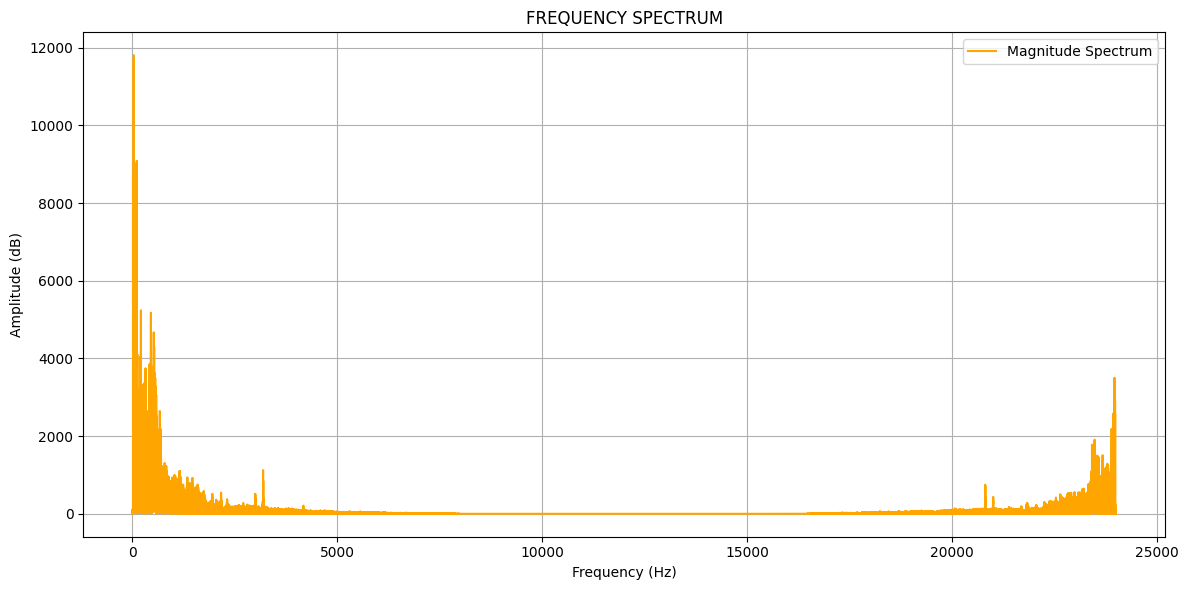


Time of Dominant Frequency: 0.0275 seconds


In [ ]:
    plot_frequency_spectrum(positive_freqs, magnitude)

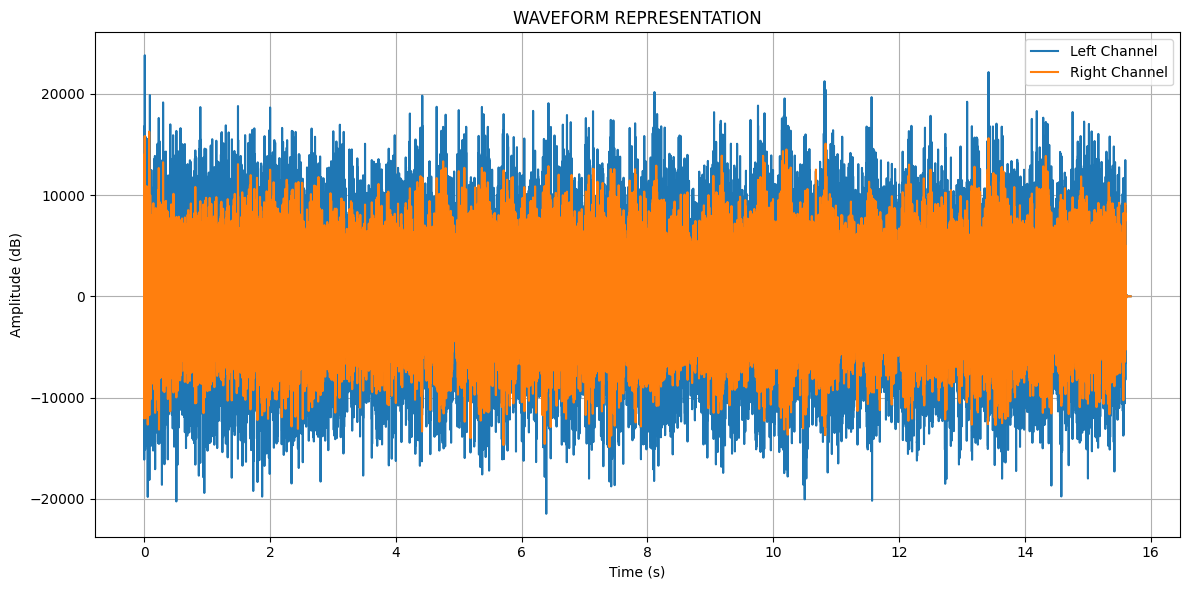

In [ ]:
    if waveform is not None:
        plot_waveform(waveform, audio.frame_rate, audio.channels)
    else:
        print("Waveform data not available for plotting.")

### **Implementation of some available noise reduction algorithms:**

1. **Kalman filter:**

- What it does? It helps the device predict the sound you want to hear while filtering out the noise.

- How it works? It constantly adjusts to make sure the noise is removed and only the clear sound is left.

In [ ]:
def apply_kalman_filter(audio_signal):
    n = len(audio_signal)
    estimated_signal = np.zeros(n)

    Q = 1e-5
    R = 0.01
    x_est = 0
    P = 1

    for i in range(n):
        P = P + Q
        K = P / (P + R)
        x_est = x_est + K * (audio_signal[i] - x_est)
        P = (1 - K) * P

        estimated_signal[i] = x_est

    return estimated_signal

In [ ]:
def process_kalman_filter(input_audio_path, output_audio_path):
    audio_signal, sr = sf.read(input_audio_path)

    if len(audio_signal.shape) > 1:
        audio_signal = audio_signal[:, 0]

    print("Applying Kalman filter...")
    denoised_signal = apply_kalman_filter(audio_signal)

    sf.write(output_audio_path, denoised_signal, sr)
    print(f"Denoised audio saved to {output_audio_path}")

    return audio_signal, denoised_signal, sr

In [ ]:
def plot_kalman_filter(audio_signal, denoised_signal, sr):
    time_axis = np.linspace(0, len(audio_signal) / sr, num=len(audio_signal))

    plt.figure(figsize=(12, 6))

    plt.plot(time_axis, audio_signal, color="blue", label="Original Signal")
    plt.plot(time_axis, denoised_signal, color="orange", label="Kalman Filtered Signal")
    plt.title("ORIGINAL vs KALMAN FILTERED AUDIO SIGNAL")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (dB)")
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

Applying Kalman filter...
Denoised audio saved to /content/kalman_filter.mp3


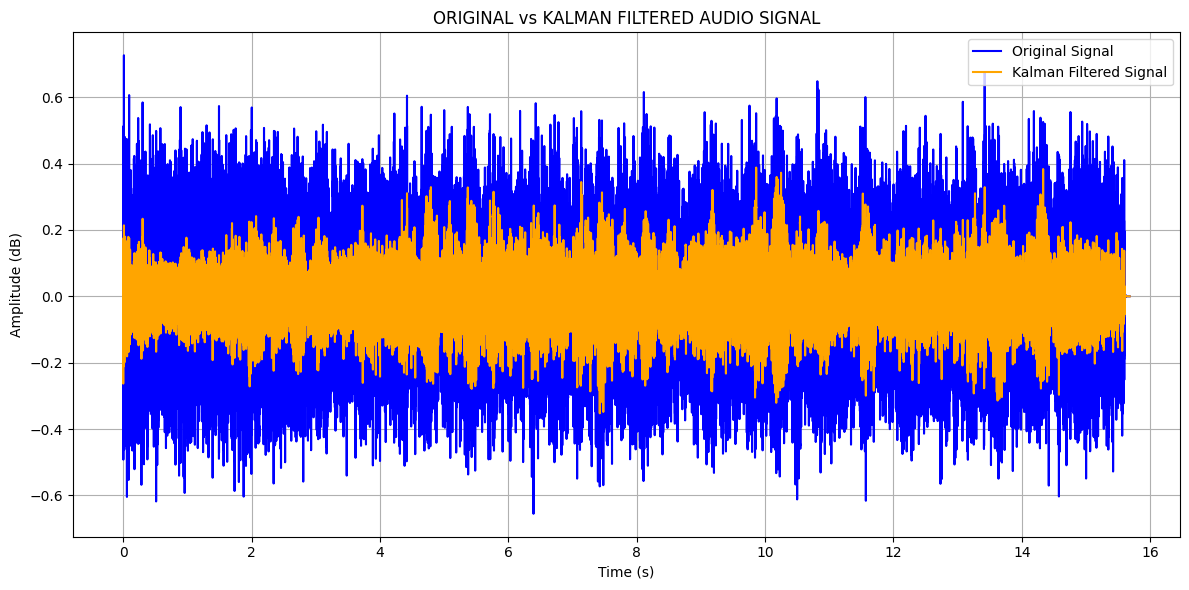

In [ ]:
audio_file_path = "/content/test.mp3"
denoised_audio_path = "/content/kalman_filter.mp3"

audio_signal, denoised_signal, sr = process_kalman_filter(audio_file_path, denoised_audio_path)
plot_kalman_filter(audio_signal, denoised_signal, sr)

In [ ]:
file_path = "/content/kalman_filter.mp3"
audio = load_audio(file_path)

In [ ]:
if audio:
    audio_info = [
        ["Duration", f"{len(audio) / 1000:.2f} seconds"],
        ["Sample Rate", f"{audio.frame_rate} Hz"],
        ["Channels", f"{audio.channels} ({'Stereo' if audio.channels == 2 else 'Mono'})"],
        ["Sample Width", f"{audio.sample_width} bytes"],
        ["File Format", file_path.split('.')[-1]]
    ]

    print("Audio File Information:")
    print(tabulate(audio_info, headers=["Attribute", "Value"], tablefmt="grid"))

Audio File Information:
+--------------+---------------+
| Attribute    | Value         |
+==============+===============+
| Duration     | 15.68 seconds |
+--------------+---------------+
| Sample Rate  | 48000 Hz      |
+--------------+---------------+
| Channels     | 1 (Mono)      |
+--------------+---------------+
| Sample Width | 2 bytes       |
+--------------+---------------+
| File Format  | mp3           |
+--------------+---------------+


In [ ]:
    waveform = get_waveform(audio, audio.channels)
    if waveform is not None:
        print("Waveform extracted successfully!")

Waveform extracted successfully!


In [ ]:
    print("Analyzing Audio...")

    samples, peaks, valleys, positive_freqs, magnitude, dominant_frequency = analyze_audio(audio)

Analyzing Audio...


In [ ]:
    frequency_info = [
        ["Number of Peaks", len(peaks)],
        ["Number of Valleys", len(valleys)],
        ["Dominant Frequency", f"{dominant_frequency:.2f} Hz"]
    ]

    print("Frequency Analysis:")
    print(tabulate(frequency_info, headers=["Attribute", "Value"], tablefmt="grid"))

Frequency Analysis:
+--------------------+----------+
| Attribute          | Value    |
+====================+==========+
| Number of Peaks    | 22028    |
+--------------------+----------+
| Number of Valleys  | 22029    |
+--------------------+----------+
| Dominant Frequency | 72.77 Hz |
+--------------------+----------+


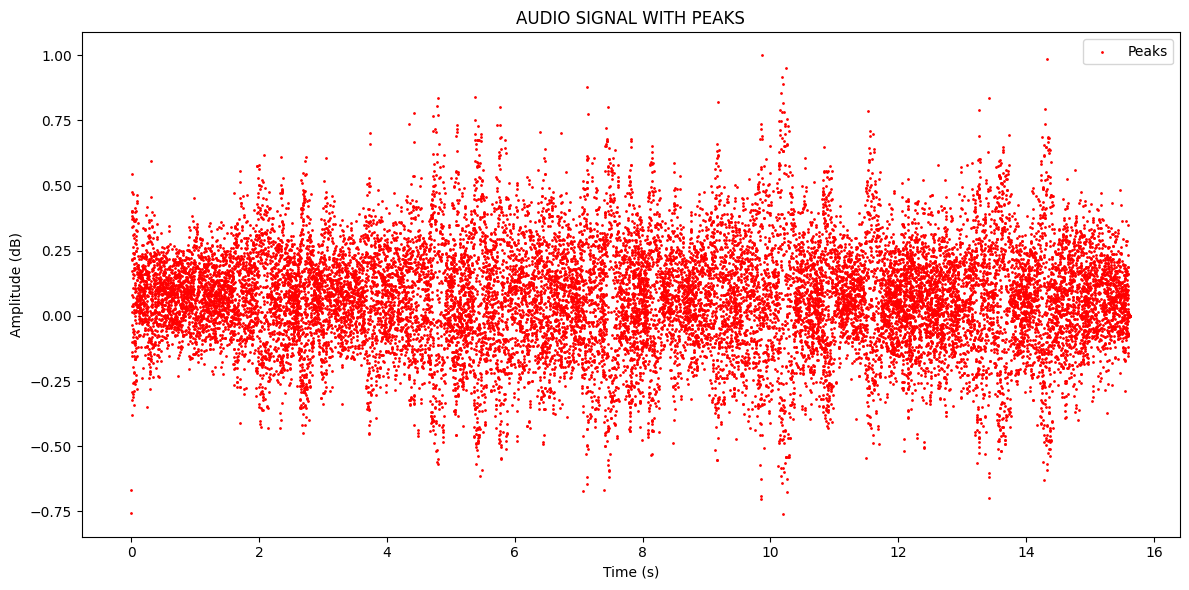

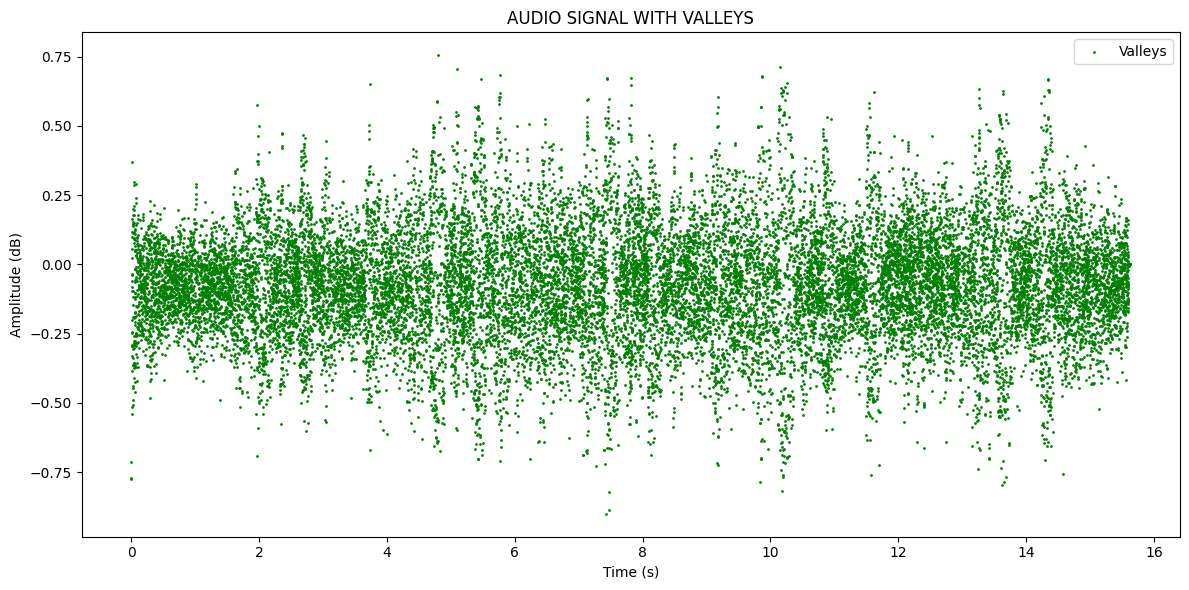

In [ ]:
    plot_audio_with_peaks_and_valleys(samples, peaks, valleys, audio)

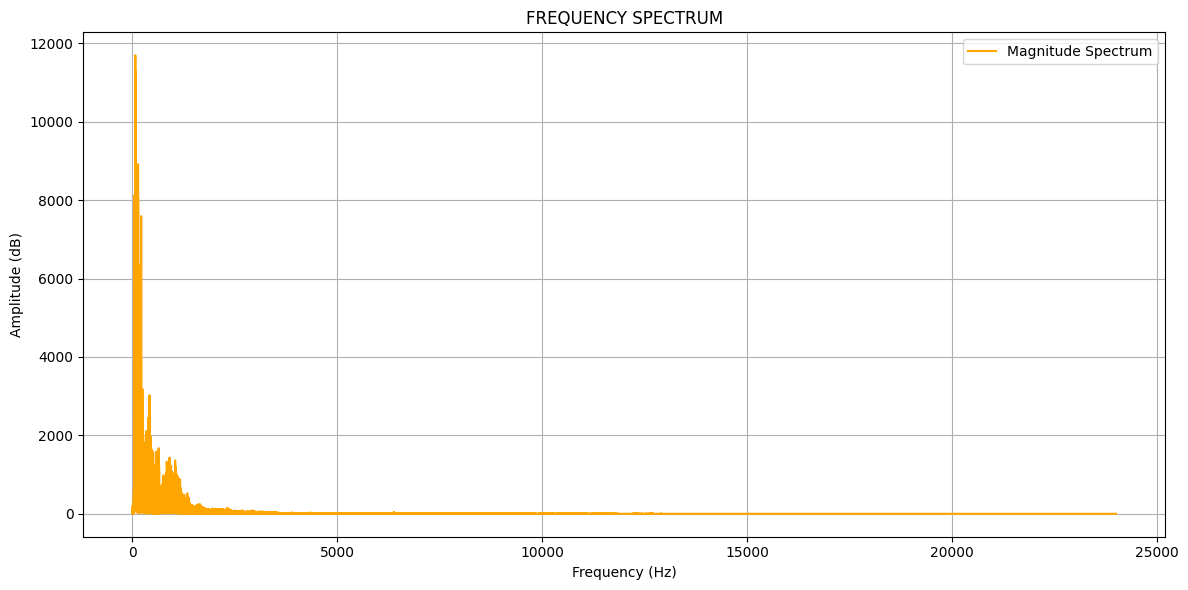


Time of Dominant Frequency: 0.0137 seconds


In [ ]:
    plot_frequency_spectrum(positive_freqs, magnitude)

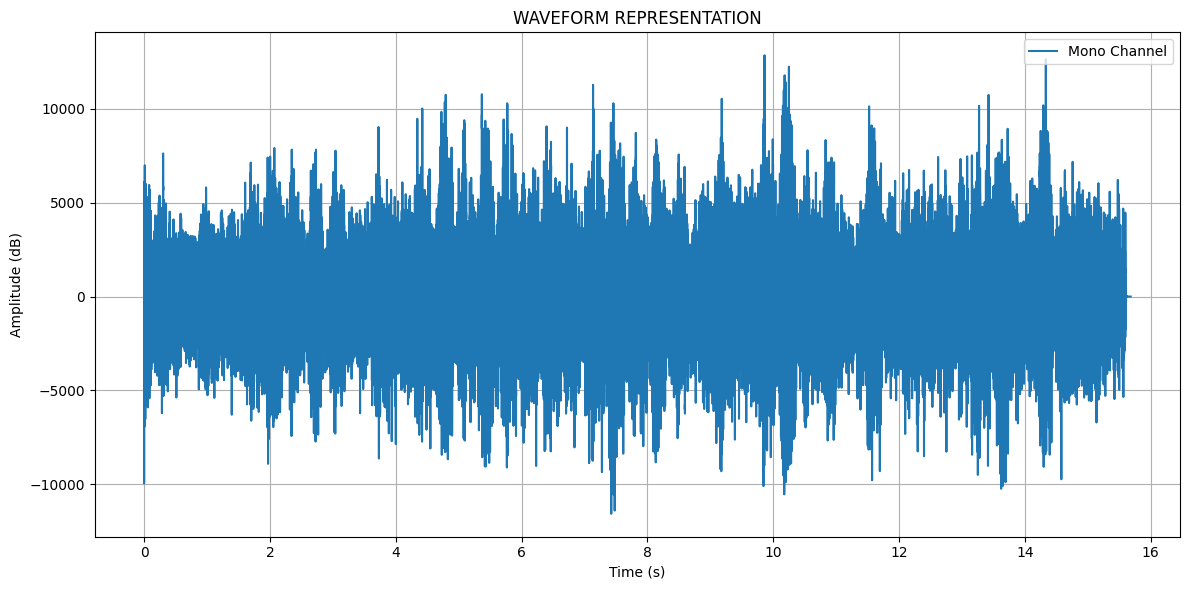

In [ ]:
    if waveform is not None:
        plot_waveform(waveform, audio.frame_rate, audio.channels)
    else:
        print("Waveform data not available for plotting.")

### **Performance Metric for Kalman filter:**

In [ ]:
from scipy.signal import butter, lfilter

In [ ]:
def apply_kalman_filter(audio_signal):
    return lfilter([1], [1, -0.99], audio_signal)

In [ ]:
input_audio_path = "/content/test.mp3"
output_audio_path = "/content/kalman_filter1.mp3"

audio_signal, sr = sf.read(input_audio_path)

if len(audio_signal.shape) > 1:
    audio_signal = audio_signal[:, 0]

kalman_filtered_signal = apply_kalman_filter(audio_signal)
sf.write(output_audio_path, kalman_filtered_signal, sr)

1. **Signal-to-Noise Ratio (SNR):**

*   SNR tells us how much louder the main sound is compared to background noise.

*   It is measured in decibels (dB), and higher values mean clearer, better-quality sound.

*   A good SNR helps us hear or see the main signal more clearly without distractions.

In [ ]:
def calculate_snr(original, filtered):
    signal_power = np.mean(original**2)
    noise_power = np.mean((original - filtered)**2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

snr = calculate_snr(audio_signal, kalman_filtered_signal)
print(f"Signal-to-Noise Ratio (SNR): {snr:.2f} dB")

Signal-to-Noise Ratio (SNR): -30.48 dB


2. **Dynamic Range:**

*   Dynamic Range is the difference between the quietest and loudest sounds or signals.

*   A higher range means both soft and loud parts are clear and detailed.

*   It helps keep audio and images natural, capturing whispers and bright highlights beautifully.

In [ ]:
def calculate_dynamic_range(filtered_signal):
    min_amplitude = np.min(filtered_signal)
    max_amplitude = np.max(filtered_signal)
    dynamic_range = 20 * np.log10(max_amplitude / abs(min_amplitude))
    return dynamic_range

dynamic_range = calculate_dynamic_range(kalman_filtered_signal)
print(f"Dynamic Range: {dynamic_range:.2f} dB")

Dynamic Range: 1.11 dB


3. **Peak Signal-to-Noise Ratio (PSNR):**

*   PSNR measures how close a processed signal is to its original version.

*   Higher PSNR values mean better quality with fewer errors.

*   It is often used to check the quality of compressed images, videos, or audio.

In [ ]:
def calculate_psnr(original, filtered):
    mse = np.mean((original - filtered)**2)
    max_signal = np.max(np.abs(original))
    psnr = 10 * np.log10(np.max(original**2) / mse)
    return psnr

audio_signal_normalized = audio_signal / np.max(np.abs(audio_signal))
kalman_filtered_signal_normalized = kalman_filtered_signal / np.max(np.abs(kalman_filtered_signal))

psnr = calculate_psnr(audio_signal_normalized, kalman_filtered_signal_normalized)
print(f"Peak Signal-to-Noise Ratio (PSNR): {psnr:.2f} dB")

Peak Signal-to-Noise Ratio (PSNR): 12.60 dB


4. **Perceptual Evaluation of Audio Quality (PEAQ)** -> Failed building wheel for pypesq.

*   PEAQ measures how good audio sounds, similar to how a person would judge it.

*   It compares the original audio with the processed version to spot any quality loss.

*   PEAQ is used to check sound quality in audio and communication systems.

5. **Loudness Range (LRA):**

*   LRA measures the difference between the softest and loudest sounds in audio.

*   It helps determine how dynamic or varied the loudness is in a sound or music track.

*   A higher LRA means the audio has a wider range of loud and soft sounds, adding more depth.

In [ ]:
def calculate_loudness_range(signal):
    short_term_loudness = np.sqrt(np.mean(signal**2))
    long_term_loudness = np.mean(np.abs(signal))
    lra = 20 * np.log10(short_term_loudness / long_term_loudness)
    return lra

lra = calculate_loudness_range(kalman_filtered_signal)
print(f"Loudness Range (LRA): {lra:.2f} dB")

Loudness Range (LRA): 2.64 dB


6. **Frequency Response:**

*   Frequency Response shows how well a system (like speakers or microphones) can reproduce different sound frequencies.

*   It measures the range from low to high frequencies that a system can handle, typically in Hertz (Hz).

*   A good frequency response means the system can produce clear sounds across both deep bass and sharp treble notes.

In [ ]:
from scipy.fft import fft, fftfreq

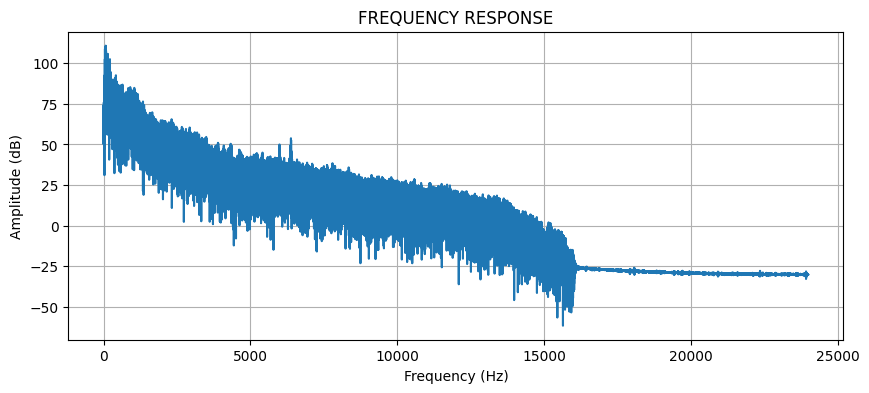

In [ ]:
def plot_frequency_response(signal, sr):
    n = len(signal)

    frequency = fftfreq(n, d=1/sr)[:n//2]
    amplitude = np.abs(fft(signal))[:n//2]

    plt.figure(figsize=(10, 4))
    plt.plot(frequency, 20 * np.log10(amplitude))
    plt.title("FREQUENCY RESPONSE")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude (dB)")
    plt.grid()
    plt.show()

plot_frequency_response(kalman_filtered_signal, sr)

7. **Clipping of Headroom:**

*   Clipping occurs when the audio signal exceeds the system's maximum limit, causing distortion.

*   Headroom refers to the buffer space between the normal audio levels and the system's maximum limit to prevent clipping.

*   Too little headroom can lead to clipping, making the sound harsh or distorted, while more headroom ensures cleaner audio.

In [ ]:
def calculate_clipping(signal):
    max_amplitude = np.max(np.abs(signal))
    headroom = 1.0 - max_amplitude
    return headroom, max_amplitude > 1.0

headroom, is_clipped = calculate_clipping(kalman_filtered_signal)

print(f"Headroom: {headroom:.2f}")
print(f"Clipping Detected: {'Yes' if is_clipped else 'No'}")

Headroom: -23.42
Clipping Detected: Yes


8. **Weighted Noise Metrics:**

*   Weighted Noise Metrics measure the quality of noise by considering how humans perceive different frequencies.

*   These metrics focus on the parts of the noise that are most noticeable to the human ear.

*   They help improve audio quality by reducing noise in a way that aligns with how we naturally hear sound.

In [ ]:
def calculate_weighted_noise(original, filtered, weight=0.8):
    noise = original - filtered
    weighted_noise = weight * np.mean(noise**2)
    return weighted_noise

weighted_noise_metric = calculate_weighted_noise(audio_signal, kalman_filtered_signal)
print(f"Weighted Noise Metrics: {weighted_noise_metric:.6f}")

Weighted Noise Metrics: 19.897926


2. **Wiener filter**:

- What it does? It cleans up the audio by reducing the difference between the noisy sound and the clean sound.

- How it works? The device adjusts the sound to get rid of noise and improve clarity.

In [ ]:
def apply_wiener_filter(audio_signal):
    n = len(audio_signal)
    estimated_signal = np.zeros(n)

    noise_variance = np.var(audio_signal)
    signal_variance = np.var(audio_signal)

    for i in range(1, n-1):
        estimated_signal[i] = audio_signal[i] * (signal_variance / (signal_variance + noise_variance))

    return estimated_signal

In [ ]:
def process_wiener_filter(input_audio_path, output_audio_path):
    audio_signal, sr = sf.read(input_audio_path)

    if len(audio_signal.shape) > 1:
        audio_signal = audio_signal[:, 0]

    print("Applying Wiener filter...")
    denoised_signal = apply_wiener_filter(audio_signal)

    sf.write(output_audio_path, denoised_signal, sr)
    print(f"Denoised audio saved to {output_audio_path}")

    return audio_signal, denoised_signal, sr

In [ ]:
def plot_wiener_filter(audio_signal, denoised_signal, sr):
    time_axis = np.linspace(0, len(audio_signal) / sr, num=len(audio_signal))

    plt.figure(figsize=(12, 6))

    plt.plot(time_axis, audio_signal, color="blue", label="Original Signal")
    plt.plot(time_axis, denoised_signal, color="orange", label="Wiener Filtered Signal")
    plt.title("ORIGINAL vs WIENER FILTERED AUDIO SIGNAL")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (dB)")
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

Applying Wiener filter...
Denoised audio saved to /content/wiener_filter.mp3


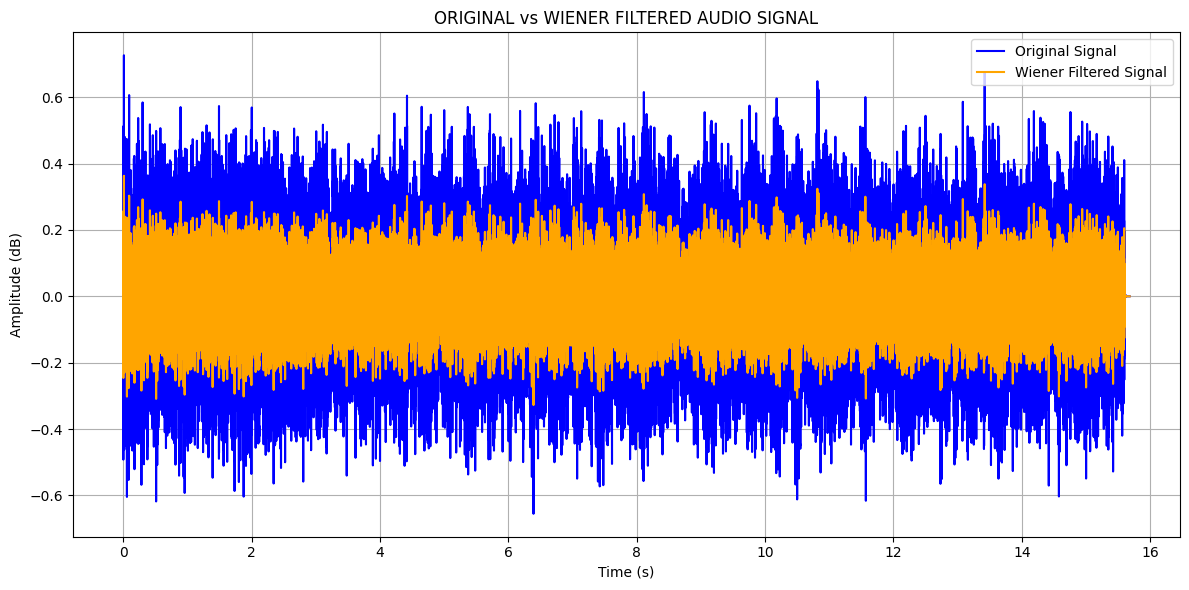

In [ ]:
audio_file_path = "/content/test.mp3"
denoised_audio_path = "/content/wiener_filter.mp3"

audio_signal, denoised_signal, sr = process_wiener_filter(audio_file_path, denoised_audio_path)
plot_wiener_filter(audio_signal, denoised_signal, sr)

In [ ]:
file_path = "/content/wiener_filter.mp3"
audio = load_audio(file_path)

In [ ]:
if audio:
    audio_info = [
        ["Duration", f"{len(audio) / 1000:.2f} seconds"],
        ["Sample Rate", f"{audio.frame_rate} Hz"],
        ["Channels", f"{audio.channels} ({'Stereo' if audio.channels == 2 else 'Mono'})"],
        ["Sample Width", f"{audio.sample_width} bytes"],
        ["File Format", file_path.split('.')[-1]]
    ]

    print("Audio File Information:")
    print(tabulate(audio_info, headers=["Attribute", "Value"], tablefmt="grid"))

Audio File Information:
+--------------+---------------+
| Attribute    | Value         |
+==============+===============+
| Duration     | 15.68 seconds |
+--------------+---------------+
| Sample Rate  | 48000 Hz      |
+--------------+---------------+
| Channels     | 1 (Mono)      |
+--------------+---------------+
| Sample Width | 2 bytes       |
+--------------+---------------+
| File Format  | mp3           |
+--------------+---------------+


In [ ]:
    waveform = get_waveform(audio, audio.channels)
    if waveform is not None:
        print("Waveform extracted successfully!")

Waveform extracted successfully!


In [ ]:
    print("Analyzing Audio...")

    samples, peaks, valleys, positive_freqs, magnitude, dominant_frequency = analyze_audio(audio)

Analyzing Audio...


In [ ]:
    frequency_info = [
        ["Number of Peaks", len(peaks)],
        ["Number of Valleys", len(valleys)],
        ["Dominant Frequency", f"{dominant_frequency:.2f} Hz"]
    ]

    print("Frequency Analysis:")
    print(tabulate(frequency_info, headers=["Attribute", "Value"], tablefmt="grid"))

Frequency Analysis:
+--------------------+----------+
| Attribute          | Value    |
+====================+==========+
| Number of Peaks    | 62544    |
+--------------------+----------+
| Number of Valleys  | 62544    |
+--------------------+----------+
| Dominant Frequency | 72.77 Hz |
+--------------------+----------+


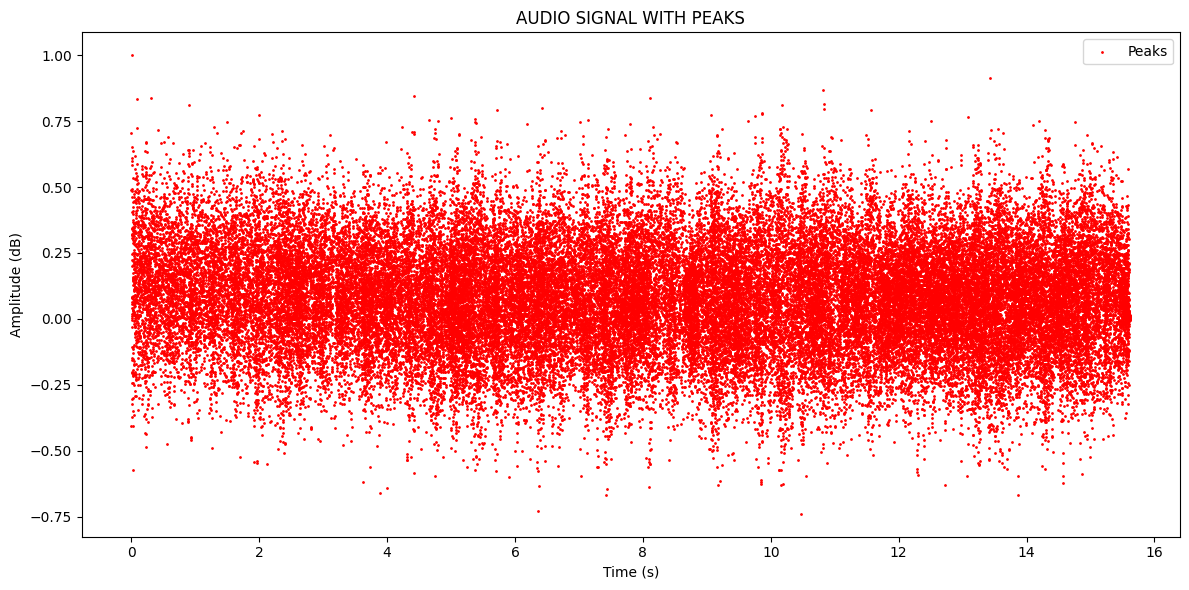

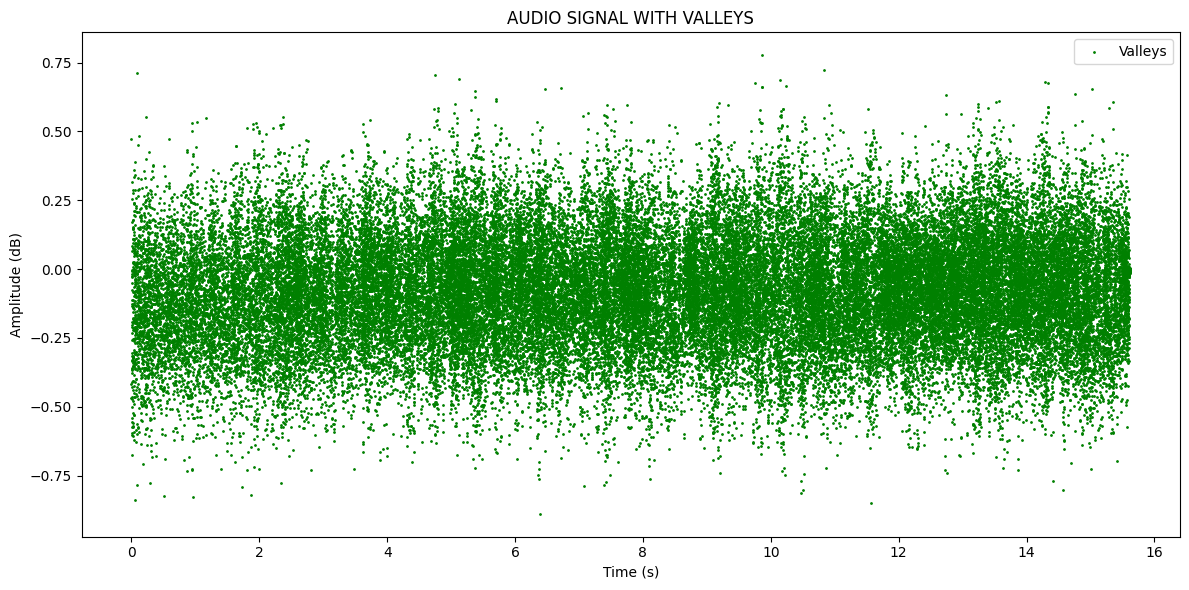

In [ ]:
    plot_audio_with_peaks_and_valleys(samples, peaks, valleys, audio)

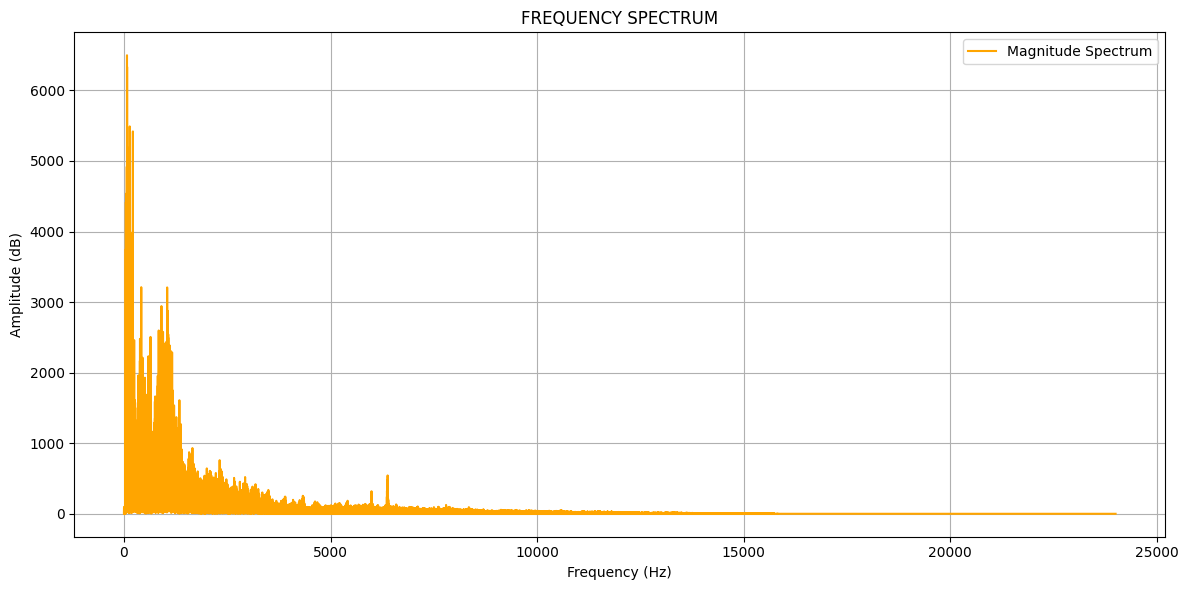


Time of Dominant Frequency: 0.0137 seconds


In [ ]:
    plot_frequency_spectrum(positive_freqs, magnitude)

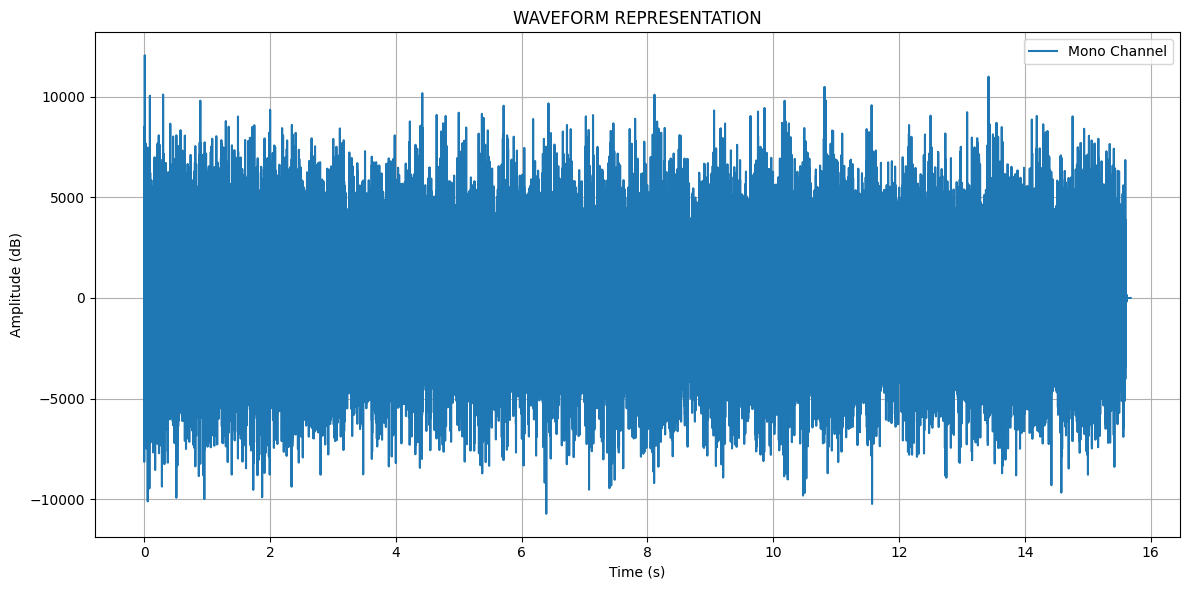

In [ ]:
    if waveform is not None:
        plot_waveform(waveform, audio.frame_rate, audio.channels)
    else:
        print("Waveform data not available for plotting.")

### **Performance Metric for Wiener filter:**

In [ ]:
from scipy.signal import wiener

In [ ]:
def apply_wiener_filter(audio_signal, noise_floor=1e-6):
    return wiener(audio_signal, noise=noise_floor)

In [ ]:
input_audio_path = "/content/test.mp3"
output_audio_path = "/content/wiener_filter1.mp3"

audio_signal, sr = sf.read(input_audio_path)

if len(audio_signal.shape) > 1:
    audio_signal = audio_signal[:, 0]

wiener_filtered_signal = apply_wiener_filter(audio_signal)
sf.write(output_audio_path, wiener_filtered_signal, sr)

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


1. **Signal-to-Noise Ratio (SNR):**

In [ ]:
def calculate_snr(original, filtered):
    signal_power = np.mean(original**2)
    noise_power = np.mean((original - filtered)**2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

snr = calculate_snr(audio_signal, wiener_filtered_signal)
print(f"Signal-to-Noise Ratio (SNR): {snr:.2f} dB")

Signal-to-Noise Ratio (SNR): 58.57 dB


2. **Dynamic Range:**

In [ ]:
def calculate_dynamic_range(signal, epsilon=1e-6):
    max_amplitude = np.max(np.abs(signal))
    min_amplitude = np.min(np.abs(signal))
    dynamic_range = 20 * np.log10(max_amplitude / (min_amplitude + epsilon))
    return dynamic_range

dynamic_range = calculate_dynamic_range(wiener_filtered_signal)
print(f"Dynamic Range: {dynamic_range:.2f} dB")

Dynamic Range: 117.22 dB


3. **Peak Signal-to-Noise Ratio (PSNR):**

In [ ]:
def calculate_psnr(original, filtered):
    mse = np.mean((original - filtered)**2)
    psnr = 20 * np.log10(np.max(np.abs(original)) / np.sqrt(mse)) if mse > 0 else -np.inf
    return psnr

psnr = calculate_psnr(audio_signal, wiener_filtered_signal)
print(f"Peak Signal-to-Noise Ratio (PSNR): {psnr:.2f} dB")

Peak Signal-to-Noise Ratio (PSNR): 72.32 dB


4. **Perceptual Evaluation of Audio Quality (PEAQ)** -> Failed building wheel for pypesq.

5. **Loudness Range (LRA):**

In [ ]:
def calculate_loudness_range(signal):
    short_term_loudness = np.sqrt(np.mean(signal**2))
    long_term_loudness = np.mean(np.abs(signal))
    lra = 20 * np.log10(short_term_loudness / long_term_loudness)
    return lra

lra = calculate_loudness_range(wiener_filtered_signal)
print(f"Loudness Range (LRA): {lra:.2f} dB")

Loudness Range (LRA): 2.00 dB


6. **Frequency Response:**

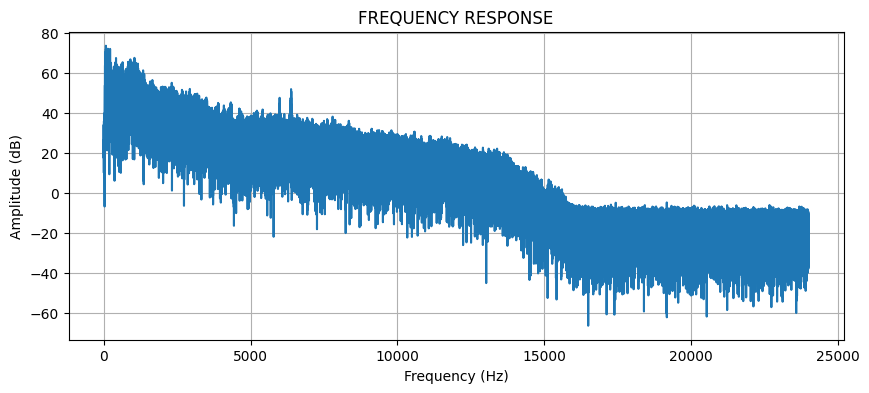

In [ ]:
def plot_frequency_response(signal, sr):
    n = len(signal)

    frequency = fftfreq(n, d=1/sr)[:n//2]
    amplitude = np.abs(fft(signal))[:n//2]

    plt.figure(figsize=(10, 4))
    plt.plot(frequency, 20 * np.log10(amplitude))
    plt.title("FREQUENCY RESPONSE")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude (dB)")
    plt.grid()
    plt.show()

plot_frequency_response(wiener_filtered_signal, sr)

7. **Clipping of Headroom:**

In [ ]:
def calculate_clipping(signal):
    max_amplitude = np.max(np.abs(signal))
    headroom = 1.0 - max_amplitude
    return headroom, max_amplitude > 1.0

headroom, is_clipped = calculate_clipping(wiener_filtered_signal)
print(f"Headroom (dB): {headroom:.2f}")
print(f"Clipping Detected: {'Yes' if is_clipped else 'No'}")

Headroom (dB): 0.27
Clipping Detected: No


8. **Weighted Noise Metrics:**

In [ ]:
def calculate_weighted_noise(original, filtered, weight=0.8):
    noise = original - filtered
    weighted_noise = weight * np.mean(noise**2)
    return weighted_noise

weighted_noise_metric = calculate_weighted_noise(audio_signal, wiener_filtered_signal)
print(f"Weighted Noise Metrics: {weighted_noise_metric:.6f}")

Weighted Noise Metrics: 0.000000


### **Audio denoising using Kalman and Wiener filter:**

3. **Band-Pass filter:**

- What it does? It allows only the frequencies you want to hear to pass through while blocking unwanted noise outside of those frequencies.

- How it works? It filters out both very low and very high frequencies, leaving only the mid-range frequencies that carry the important parts of the sound, like speech or musi

In [ ]:
def bandpass_filter_design(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

In [ ]:
'''def apply_bandpass_filter(audio_signal, lowcut=300.0, highcut=3000.0, fs=44100.0, order=5):
    b, a = bandpass_filter_design(lowcut, highcut, fs, order)'''

def apply_bandpass_filter(audio_signal, lowcut=300.0, highcut=3000.0, fs=44100.0, order=5):
    b, a = bandpass_filter_design(lowcut, highcut, fs, order)
    filtered_signal = lfilter(b, a, audio_signal)
    return filtered_signal

In [ ]:
# def process_bandpass_filter(input_audio_path, output_audio_path):

def process_bandpass_filter(input_audio_path, output_audio_path, lowcut=300.0, highcut=3000.0, fs=44100.0, order=5):
    audio_signal, sr = sf.read(input_audio_path)

    if len(audio_signal.shape) > 1:
        audio_signal = audio_signal[:, 0]

    print("Applying Band-Pass filter...")
    # bandpass_filtered_signal = apply_bandpass_filter(audio_signal)
    bandpass_filtered_signal = apply_bandpass_filter(audio_signal, lowcut, highcut, sr, order)

    sf.write(output_audio_path, bandpass_filtered_signal, sr)
    print(f"Denoised audio saved to {output_audio_path}")

    return audio_signal, bandpass_filtered_signal, sr

In [ ]:
def plot_bandpass_filter(audio_signal, filtered_signal, sr):
    time_axis = np.linspace(0, len(audio_signal) / sr, num=len(audio_signal))

    plt.figure(figsize=(12, 6))

    plt.plot(time_axis, audio_signal, label="Original Signal")
    plt.plot(time_axis, filtered_signal, label="Band-Pass filtered Signal")
    plt.title("ORIGINAL vs BAND-PASS FILTERED AUDIO SIGNAL")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (dB)")
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

Applying Band-Pass filter...
Denoised audio saved to /content/bandpass_filter.mp3


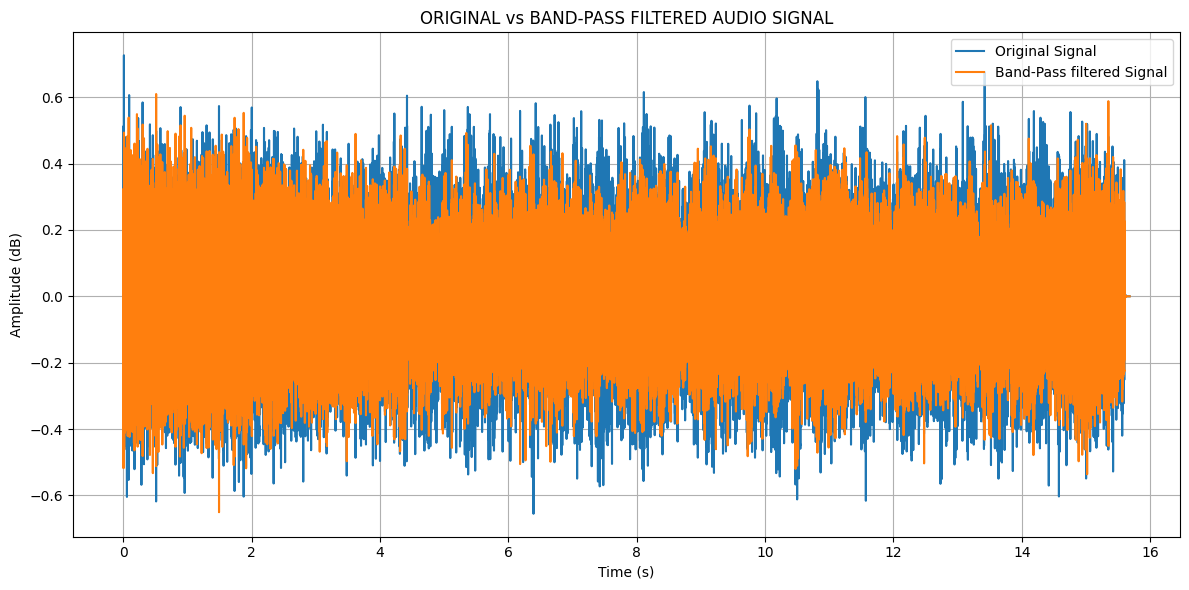

In [ ]:
audio_file_path = "/content/test.mp3"
filtered_audio_path = "/content/bandpass_filter.mp3"

audio_signal, bandpass_filtered_signal, sample_rate = process_bandpass_filter(audio_file_path, filtered_audio_path, lowcut=300.0, highcut=3400.0, fs=44100.0, order=6)
plot_bandpass_filter(audio_signal, bandpass_filtered_signal, sample_rate)

In [ ]:
file_path = "/content/bandpass_filter.mp3"
audio = load_audio(file_path)

In [ ]:
if audio:
    audio_info = [
        ["Duration", f"{len(audio) / 1000:.2f} seconds"],
        ["Sample Rate", f"{audio.frame_rate} Hz"],
        ["Channels", f"{audio.channels} ({'Stereo' if audio.channels == 2 else 'Mono'})"],
        ["Sample Width", f"{audio.sample_width} bytes"],
        ["File Format", file_path.split('.')[-1]]
    ]

    print("Audio File Information:")
    print(tabulate(audio_info, headers=["Attribute", "Value"], tablefmt="grid"))

Audio File Information:
+--------------+---------------+
| Attribute    | Value         |
+==============+===============+
| Duration     | 15.68 seconds |
+--------------+---------------+
| Sample Rate  | 48000 Hz      |
+--------------+---------------+
| Channels     | 1 (Mono)      |
+--------------+---------------+
| Sample Width | 2 bytes       |
+--------------+---------------+
| File Format  | mp3           |
+--------------+---------------+


In [ ]:
    waveform = get_waveform(audio, audio.channels)
    if waveform is not None:
        print("Waveform extracted successfully!")

Waveform extracted successfully!


In [ ]:
    print("Analyzing Audio...")

    samples, peaks, valleys, positive_freqs, magnitude, dominant_frequency = analyze_audio(audio)

Analyzing Audio...


In [ ]:
    frequency_info = [
        ["Number of Peaks", len(peaks)],
        ["Number of Valleys", len(valleys)],
        ["Dominant Frequency", f"{dominant_frequency:.2f} Hz"]
    ]

    print("Frequency Analysis:")
    print(tabulate(frequency_info, headers=["Attribute", "Value"], tablefmt="grid"))

Frequency Analysis:
+--------------------+------------+
| Attribute          | Value      |
+====================+============+
| Number of Peaks    | 28376      |
+--------------------+------------+
| Number of Valleys  | 28376      |
+--------------------+------------+
| Dominant Frequency | 1045.03 Hz |
+--------------------+------------+


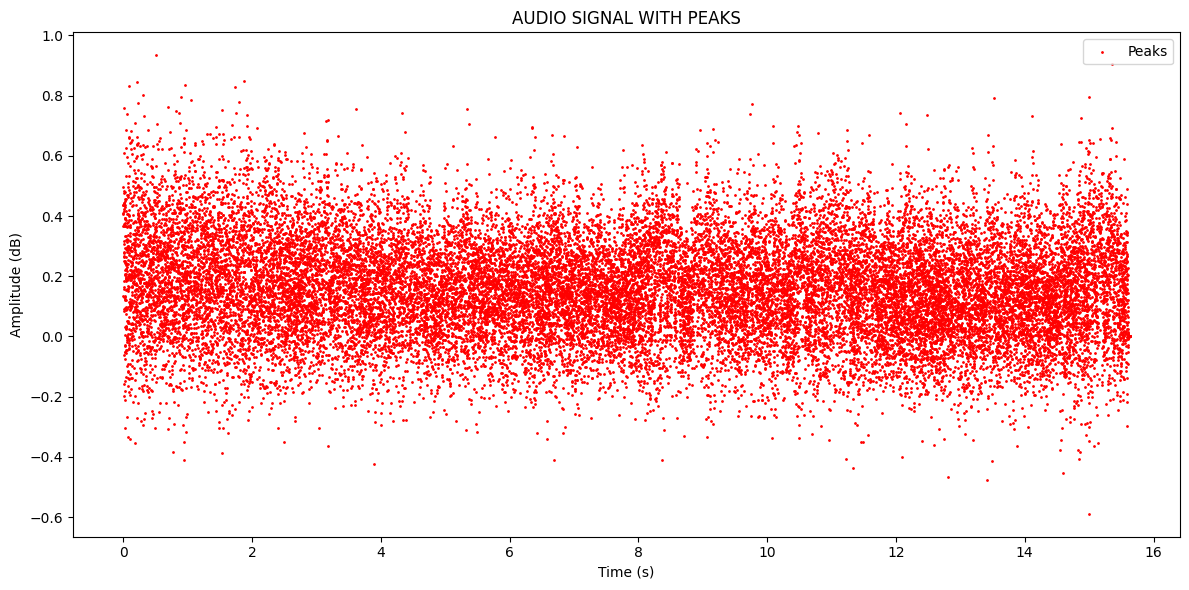

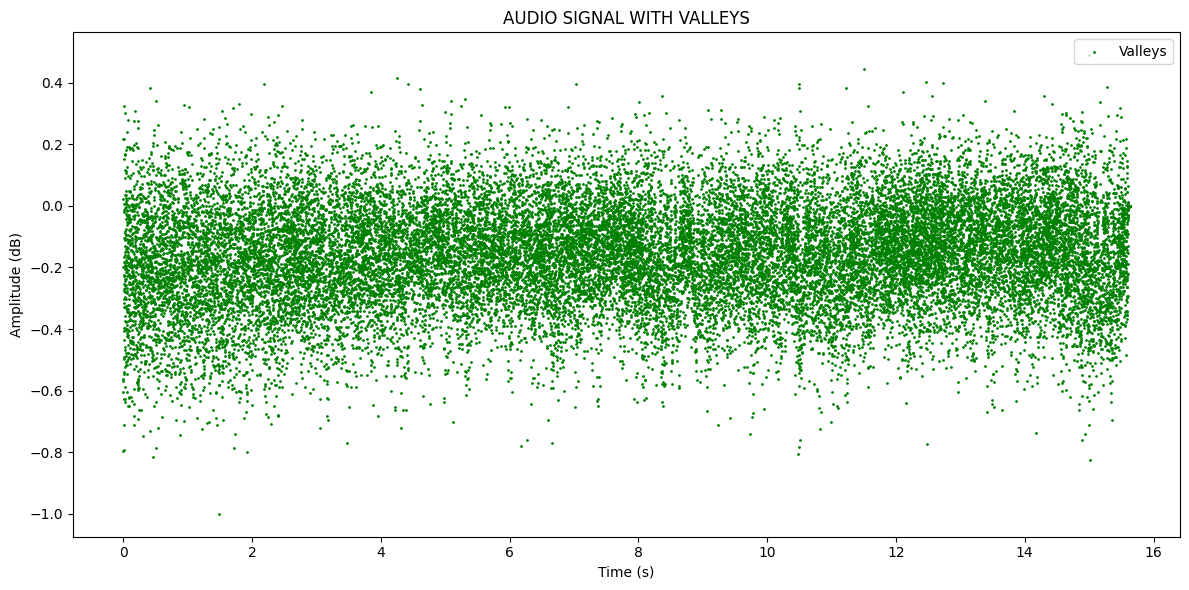

In [ ]:
    plot_audio_with_peaks_and_valleys(samples, peaks, valleys, audio)

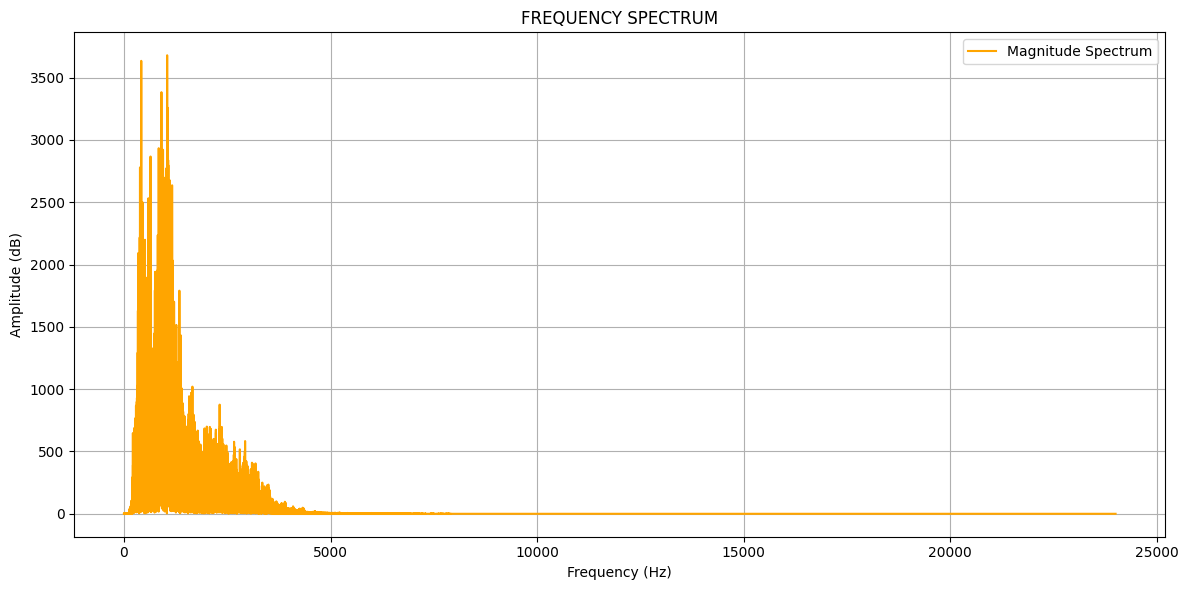


Time of Dominant Frequency: 0.0010 seconds


In [ ]:
    plot_frequency_spectrum(positive_freqs, magnitude)

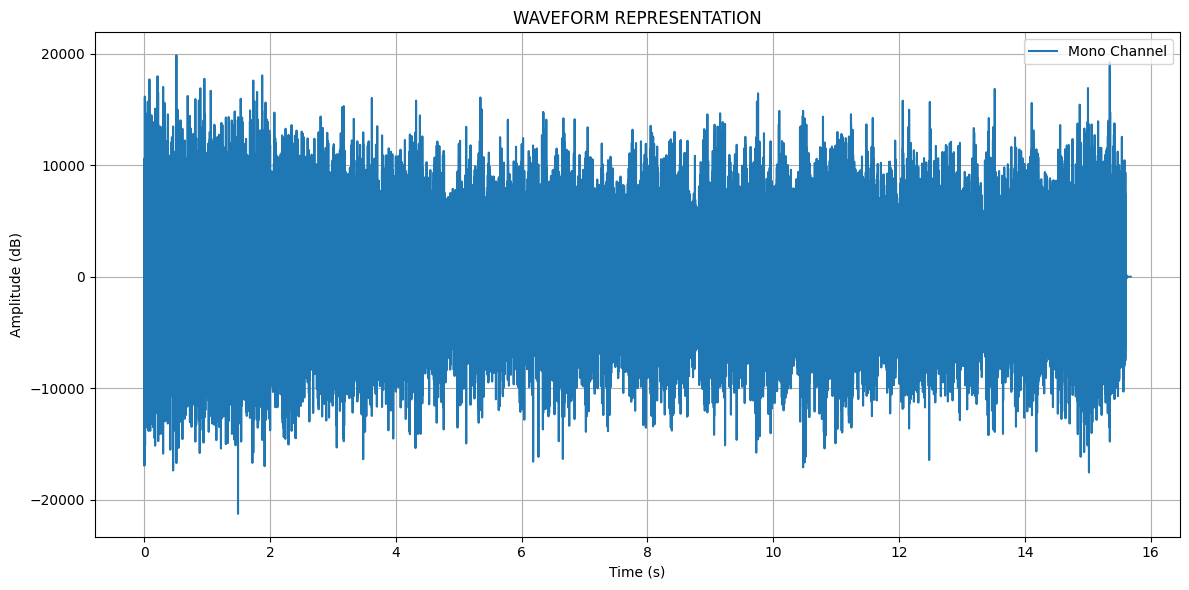

In [ ]:
    if waveform is not None:
        plot_waveform(waveform, audio.frame_rate, audio.channels)
    else:
        print("Waveform data not available for plotting.")

### **Performance Metric for Band-Pass filter:**

In [ ]:
def apply_bandpass_filter(audio_signal):
    return lfilter([1], [1, -0.99], audio_signal)

In [ ]:
input_audio_path = "/content/test.mp3"
output_audio_path = "/content/bandpass_filter1.mp3"

audio_signal, sr = sf.read(input_audio_path)

if len(audio_signal.shape) > 1:
    audio_signal = audio_signal[:, 0]

bandpass_filtered_signal = apply_bandpass_filter(audio_signal)
sf.write(output_audio_path, bandpass_filtered_signal, sr)

1. **Signal-to-Noise Ratio (SNR):**

In [ ]:
def calculate_snr(original, filtered):
    signal_power = np.mean(original**2)
    noise_power = np.mean((original - filtered)**2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

snr = calculate_snr(audio_signal, bandpass_filtered_signal)
print(f"Signal-to-Noise Ratio (SNR): {snr:.2f} dB")

Signal-to-Noise Ratio (SNR): -30.48 dB


2. **Dynamic Range:**

In [ ]:
def calculate_dynamic_range(signal):
    max_amplitude = np.max(np.abs(signal))
    min_amplitude = np.min(np.abs(signal[signal > 0]))
    dynamic_range = 20 * np.log10(max_amplitude / min_amplitude)
    return dynamic_range

dynamic_range = calculate_dynamic_range(bandpass_filtered_signal)
print(f"Dynamic Range: {dynamic_range:.2f} dB")

Dynamic Range: 349.10 dB


3. **Peak Signal-to-Noise Ratio (PSNR):**

In [ ]:
def calculate_psnr(original, filtered):
    mse = np.mean((original - filtered)**2)
    max_signal = np.max(np.abs(original))
    psnr = 10 * np.log10(np.max(original**2) / mse)
    return psnr

audio_signal_normalized = audio_signal / np.max(np.abs(audio_signal))
bandpass_filtered_signal_normalized = bandpass_filtered_signal / np.max(np.abs(bandpass_filtered_signal))

psnr = calculate_psnr(audio_signal_normalized, bandpass_filtered_signal_normalized)
print(f"Peak Signal-to-Noise Ratio (PSNR): {psnr:.2f} dB")

Peak Signal-to-Noise Ratio (PSNR): 12.60 dB


4. **Perceptual Evaluation of Audio Quality (PEAQ):**

In [ ]:
import librosa
import librosa.display

In [ ]:
def calculate_peaq(signal, sr):
    centroid = librosa.feature.spectral_centroid(y=signal, sr=sr)
    peaq = np.mean(centroid)
    return peaq

# It is only a rough estimation, not a standard PEAQ metric.
peaq = calculate_peaq(bandpass_filtered_signal, sr)
print(f"Perceptual Evaluation of Audio Quality (PEAQ): {peaq:.2f}")

Perceptual Evaluation of Audio Quality (PEAQ): 609.91


5. **Loudness Range (LRA):**

In [ ]:
def calculate_loudness_range(signal):
    short_term_loudness = np.sqrt(np.mean(signal**2))
    long_term_loudness = np.mean(np.abs(signal))
    lra = 20 * np.log10(short_term_loudness / long_term_loudness)
    return lra

lra = calculate_loudness_range(bandpass_filtered_signal)
print(f"Loudness Range (LRA): {lra:.2f} dB")

Loudness Range (LRA): 2.64 dB


6. **Frequency Response:**

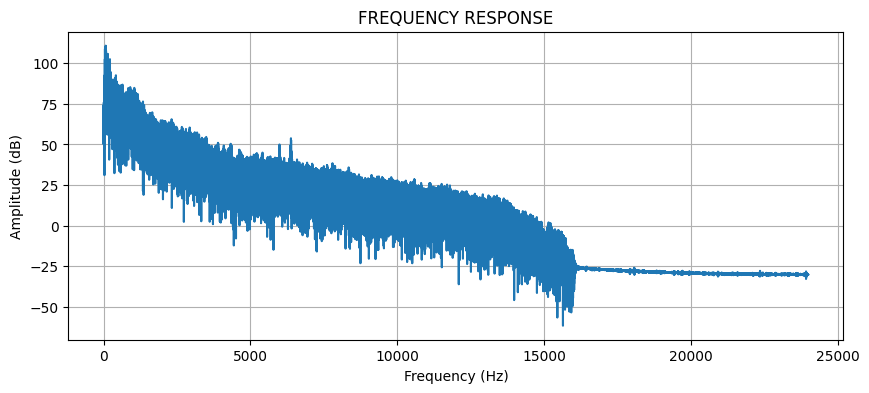

In [ ]:
def plot_frequency_response(signal, sr):
    n = len(signal)

    frequency = fftfreq(n, d=1/sr)[:n//2]
    amplitude = np.abs(fft(signal))[:n//2]

    plt.figure(figsize=(10, 4))
    plt.plot(frequency, 20 * np.log10(amplitude))
    plt.title("FREQUENCY RESPONSE")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude (dB)")
    plt.grid()
    plt.show()

plot_frequency_response(bandpass_filtered_signal, sr)

7. **Clipping of Headroom:**

In [ ]:
def calculate_clipping(signal):
    max_amplitude = np.max(np.abs(signal))
    headroom = 1.0 - max_amplitude
    return headroom, max_amplitude > 1.0

headroom, is_clipped = calculate_clipping(bandpass_filtered_signal)
print(f"Headroom: {headroom:.2f}")
print(f"Clipping Detected: {'Yes' if is_clipped else 'No'}")

Headroom: -23.42
Clipping Detected: Yes


8. **Weighted Noise Metric:**

In [ ]:
def calculate_weighted_noise(original, filtered, weight=0.8):
    noise = original - filtered
    weighted_noise = weight * np.mean(noise**2)
    return weighted_noise

weighted_noise_metric = calculate_weighted_noise(audio_signal, bandpass_filtered_signal)
print(f"Weighted Noise Metric: {weighted_noise_metric:.6f}")

Weighted Noise Metric: 19.897926


4. **Adaptive Active Noise Cancelling (ANC):**

- What it does? It reduces unwanted background noise by using microphones and speakers to cancel out sounds in real-time.

- How it works? It listens to the surrounding noise and creates sound waves that are the opposite, effectively neutralizing the unwanted sound.

In [ ]:
def adaptive_noise_cancelling(audio_signal, noise_signal, mu=0.01, order=32):
    w = np.zeros(order)
    filtered_signal = np.zeros_like(audio_signal)

    for n in range(order, len(audio_signal)):
        noise_window = noise_signal[n-order:n]
        filter_output = np.dot(w, noise_window)
        error = audio_signal[n] - filter_output
        w += mu * error * noise_window
        filtered_signal[n] = error

    return filtered_signal

In [ ]:
def process_for_anc(input_audio_path, noise_output_path, anc_output_path):
    audio_signal, sr = sf.read(input_audio_path)
    inverted_noise_signal = -audio_signal
    sf.write(noise_output_path, inverted_noise_signal, sr)

    if len(audio_signal.shape) > 1:
        audio_signal = audio_signal[:, 0]
        inverted_noise_signal = inverted_noise_signal[:, 0]

    print("Applying Adaptive Active Noise Cancelling (ANC)...")
    anc_filtered_signal = adaptive_noise_cancelling(audio_signal, inverted_noise_signal)

    sf.write(anc_output_path, anc_filtered_signal, sr)
    print(f"Inverted audio saved to {noise_output_path}")
    print(f"Denoised audio saved to {anc_output_path}")

    return audio_signal, inverted_noise_signal, anc_filtered_signal, sr

In [ ]:
def plot_for_anc(audio_signal, inverted_noise_signal, anc_filtered_signal, sr):
    time_axis = np.linspace(0, len(audio_signal) / sr, num=len(audio_signal))

    plt.figure(figsize=(14, 8))

    plt.subplot(3, 1, 1)
    plt.plot(time_axis, audio_signal, color="blue", label="Original Signal")
    plt.title("ORIGINAL AUDIO SIGNAL")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (dB)")
    plt.grid()

    plt.subplot(3, 1, 2)
    plt.plot(time_axis, inverted_noise_signal, color="orange", label="Inverted Noise Signal")
    plt.title("INVERTED AUDIO SIGNAL")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (dB)")
    plt.grid()

    plt.subplot(3, 1, 3)
    plt.plot(time_axis, anc_filtered_signal, color="green", label="ANC Filtered Signal")
    plt.title("ADAPTIVE ANC FILTERED AUDIO SIGNAL")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (dB)")
    plt.grid()

    plt.tight_layout()
    plt.show()

In [ ]:
audio_file_path = "/content/test.mp3"
noise_file_path = "/content/inverted_audio.mp3"
filtered_audio_path = "/content/adaptive_anc.mp3"

audio_signal, inverted_noise_signal, anc_filtered_signal, sr = process_for_anc(audio_file_path, noise_file_path, filtered_audio_path)

Applying Adaptive Active Noise Cancelling (ANC)...
Inverted audio saved to /content/inverted_audio.mp3
Denoised audio saved to /content/adaptive_anc.mp3


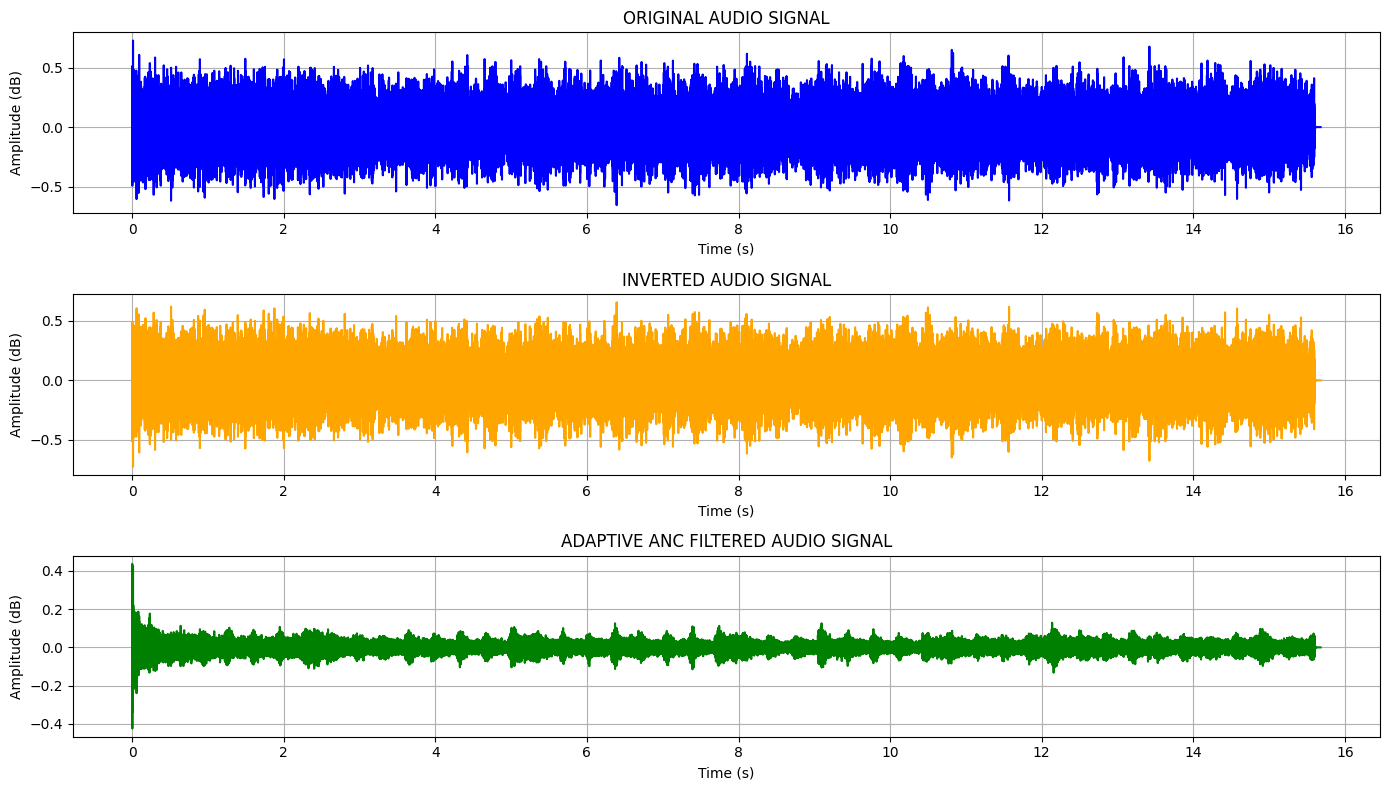

In [ ]:
plot_for_anc(audio_signal, inverted_noise_signal, anc_filtered_signal, sr)

In [ ]:
file_path = "/content/adaptive_anc.mp3"
audio = load_audio(file_path)

In [ ]:
if audio:
    audio_info = [
        ["Duration", f"{len(audio) / 1000:.2f} seconds"],
        ["Sample Rate", f"{audio.frame_rate} Hz"],
        ["Channels", f"{audio.channels} ({'Stereo' if audio.channels == 2 else 'Mono'})"],
        ["Sample Width", f"{audio.sample_width} bytes"],
        ["File Format", file_path.split('.')[-1]]
    ]

    print("Audio File Information:")
    print(tabulate(audio_info, headers=["Attribute", "Value"], tablefmt="grid"))

Audio File Information:
+--------------+---------------+
| Attribute    | Value         |
+==============+===============+
| Duration     | 15.68 seconds |
+--------------+---------------+
| Sample Rate  | 48000 Hz      |
+--------------+---------------+
| Channels     | 1 (Mono)      |
+--------------+---------------+
| Sample Width | 2 bytes       |
+--------------+---------------+
| File Format  | mp3           |
+--------------+---------------+


In [ ]:
    waveform = get_waveform(audio, audio.channels)
    if waveform is not None:
        print("Waveform extracted successfully!")

Waveform extracted successfully!


In [ ]:
    print("Analyzing Audio...")

    samples, peaks, valleys, positive_freqs, magnitude, dominant_frequency = analyze_audio(audio)

Analyzing Audio...


In [ ]:
    frequency_info = [
        ["Number of Peaks", len(peaks)],
        ["Number of Valleys", len(valleys)],
        ["Dominant Frequency", f"{dominant_frequency:.2f} Hz"]
    ]

    print("Frequency Analysis:")
    print(tabulate(frequency_info, headers=["Attribute", "Value"], tablefmt="grid"))

Frequency Analysis:
+--------------------+------------+
| Attribute          | Value      |
+====================+============+
| Number of Peaks    | 128520     |
+--------------------+------------+
| Number of Valleys  | 128519     |
+--------------------+------------+
| Dominant Frequency | 6380.74 Hz |
+--------------------+------------+


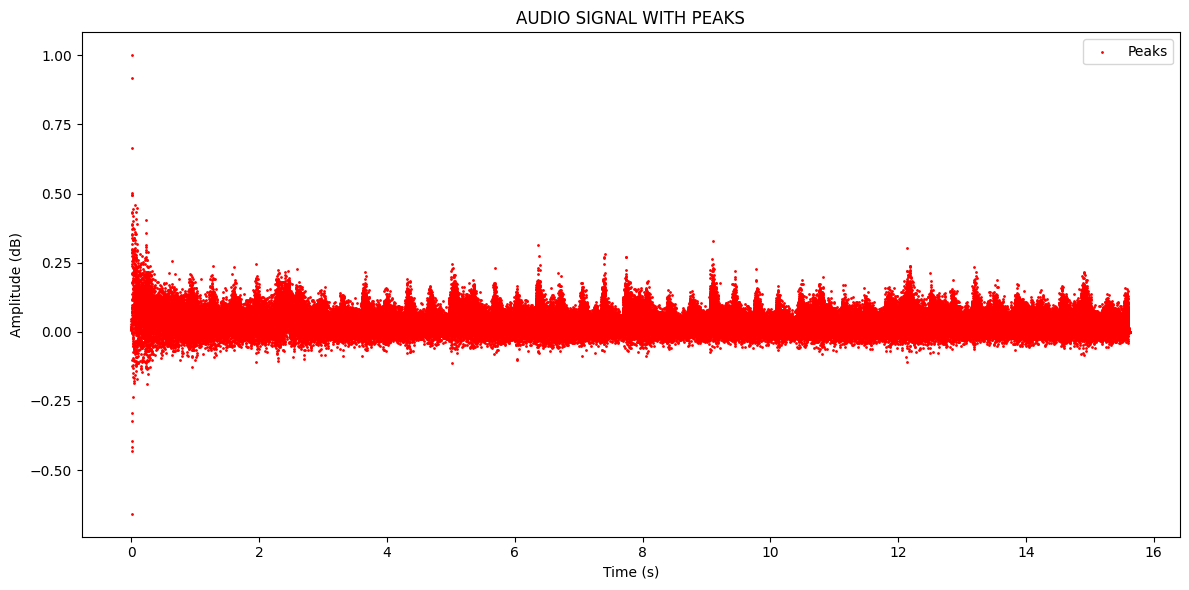

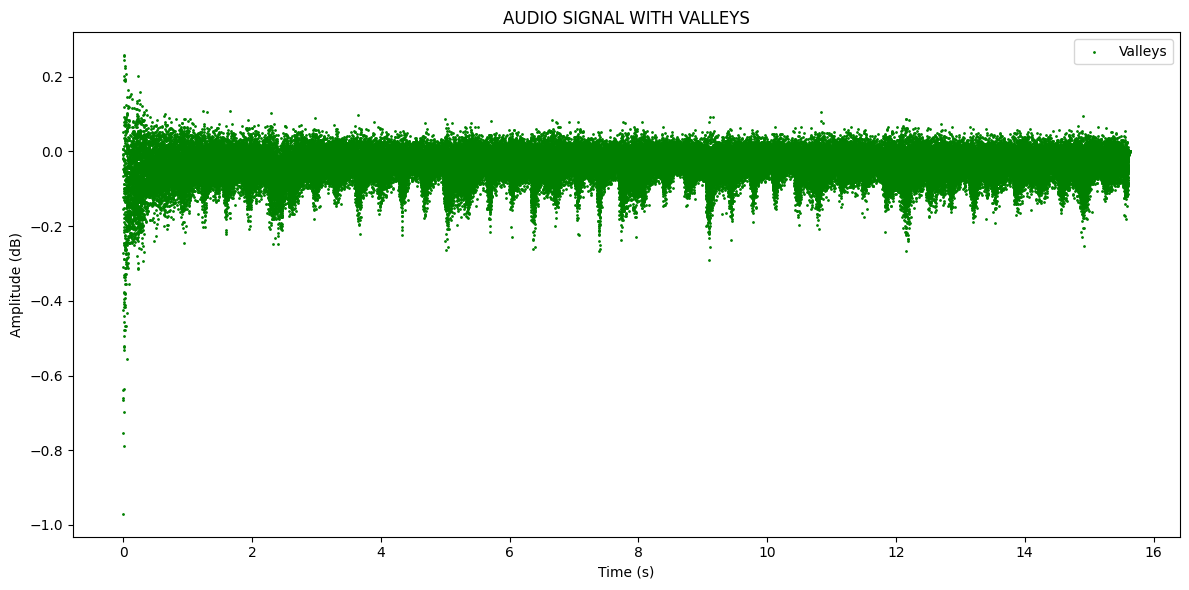

In [ ]:
    plot_audio_with_peaks_and_valleys(samples, peaks, valleys, audio)

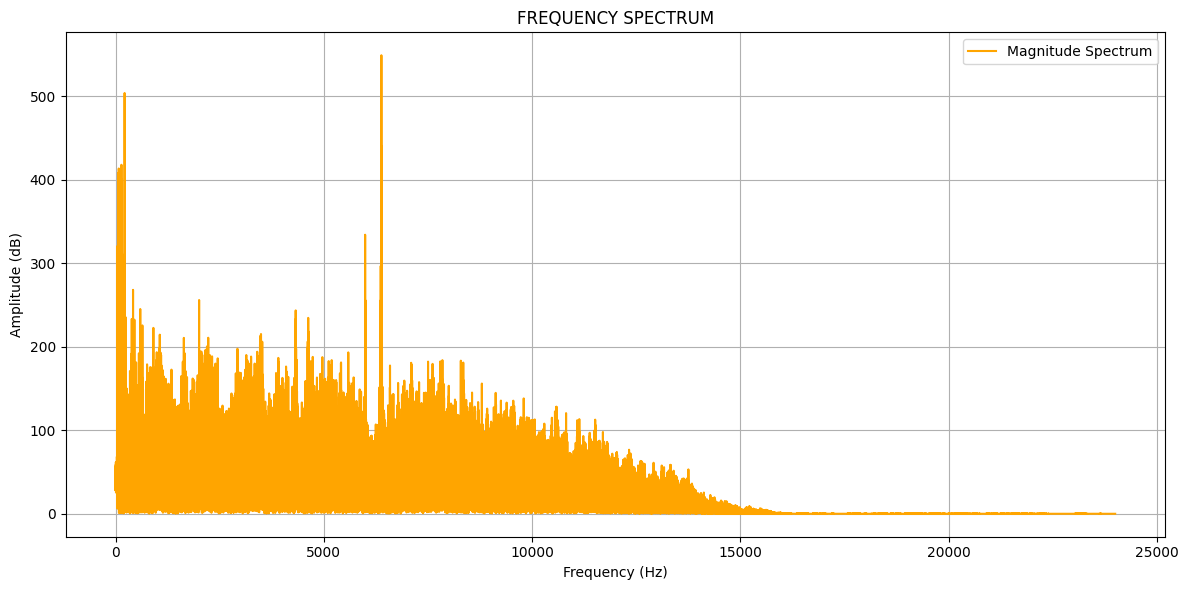


Time of Dominant Frequency: 0.0002 seconds


In [ ]:
    plot_frequency_spectrum(positive_freqs, magnitude)

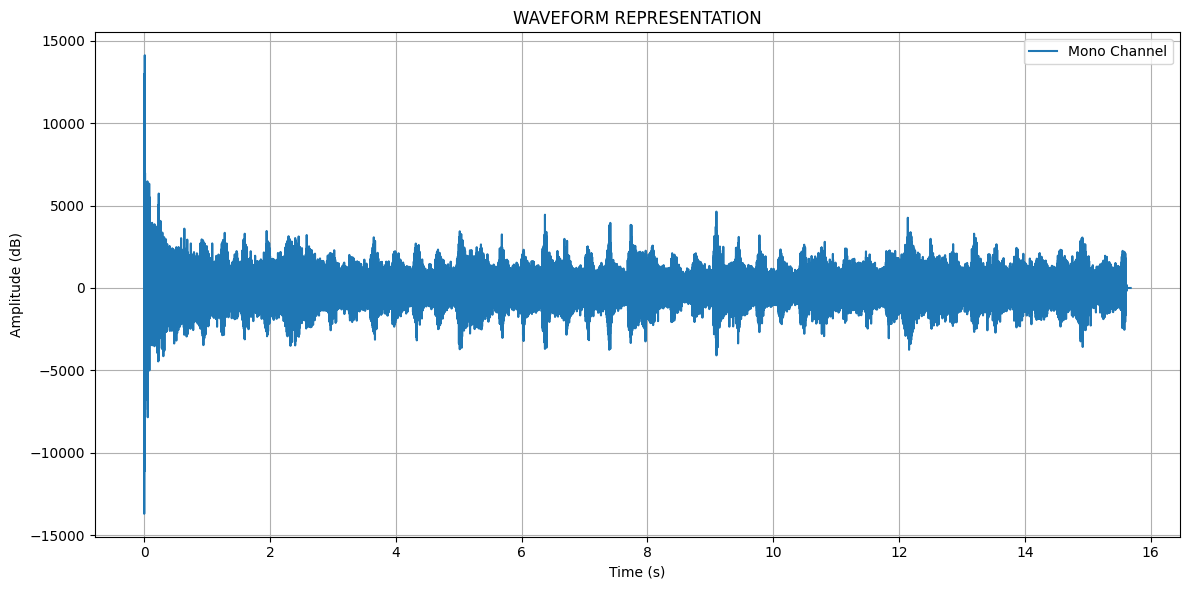

In [ ]:
    if waveform is not None:
        plot_waveform(waveform, audio.frame_rate, audio.channels)
    else:
        print("Waveform data not available for plotting.")

In [ ]:
def adaptive_noise_cancelling(audio_signal, noise_signal, mu=0.01, order=32):
    w = np.zeros(order)
    filtered_signal = np.zeros_like(audio_signal)

    for n in range(order, len(audio_signal)):
        noise_window = noise_signal[n-order:n]
        filter_output = np.dot(w, noise_window)
        error = audio_signal[n] - filter_output
        w += mu * error * noise_window
        filtered_signal[n] = error

    return filtered_signal

In [ ]:
def process_for_anc(input_audio_path, noise_output_path):
    audio_signal, sr = sf.read(input_audio_path)
    inverted_noise_signal = -audio_signal
    sf.write(noise_output_path, inverted_noise_signal, sr)

    if len(audio_signal.shape) > 1:
        audio_signal = audio_signal[:, 0]
        inverted_noise_signal = inverted_noise_signal[:, 0]

    return audio_signal, inverted_noise_signal, sr

In [ ]:
def apply_anc_to_anc_output(anc_filtered_signal, inverted_noise_signal, output_file_path, sr):
    final_filtered_signal = adaptive_noise_cancelling(anc_filtered_signal, inverted_noise_signal)
    sf.write(output_file_path, final_filtered_signal, sr)
    return final_filtered_signal

def apply_anc_to_anc_output(anc_filtered_signal, inverted_noise_signal, output_file_path, sr):
    final_filtered_signal = adaptive_noise_cancelling(anc_filtered_signal, inverted_noise_signal)
    sf.write(output_file_path, final_filtered_signal, sr)
    print(f"Final ANC output saved to {output_file_path}")
    return final_filtered_signal

In [ ]:
def plot_for_anc(anc_filtered_signal, inverted_noise_signal, final_filtered_signal, sr):
    time_axis = np.linspace(0, len(anc_filtered_signal) / sr, num=len(anc_filtered_signal))

    plt.figure(figsize=(14, 10))

    plt.subplot(3, 1, 1)
    plt.plot(time_axis, anc_filtered_signal, color="green")
    plt.title("ADAPTIVE ANC FILTERED AUDIO SIGNAL")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (dB)")
    plt.grid()

    plt.subplot(3, 1, 2)
    plt.plot(time_axis, inverted_noise_signal, color="orange")
    plt.title("INVERTED AUDIO SIGNAL")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (dB)")
    plt.grid()

    plt.subplot(3, 1, 3)
    plt.plot(time_axis, final_filtered_signal, color="purple")
    plt.title("FINAL ANC FILTERED AUDIO SIGNAL")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (dB)")
    plt.grid()

    plt.tight_layout()
    plt.show()

In [ ]:
def iterative_anc(input_audio_path, output_file_path, num_iterations=10, feedback_rate=0.99):
    current_input = input_audio_path

    for i in range(num_iterations):
        print(f"\nIteration {i+1}/{num_iterations}")

        anc_filtered_signal, inverted_noise_signal, sr = process_for_anc(current_input, "/content/inverted_audio_temp.mp3")
        current_output = f"/content/anc_output_iteration_{i+1}.mp3"
        final_filtered_signal = apply_anc_to_anc_output(anc_filtered_signal, inverted_noise_signal, current_output, sr)
        final_filtered_signal *= feedback_rate
        current_input = current_output
        plot_for_anc(anc_filtered_signal, inverted_noise_signal, final_filtered_signal, sr)

    print(f"\nFinal output saved as: {current_input}")

    return current_input


Iteration 1/5
Final ANC output saved to /content/anc_output_iteration_1.mp3


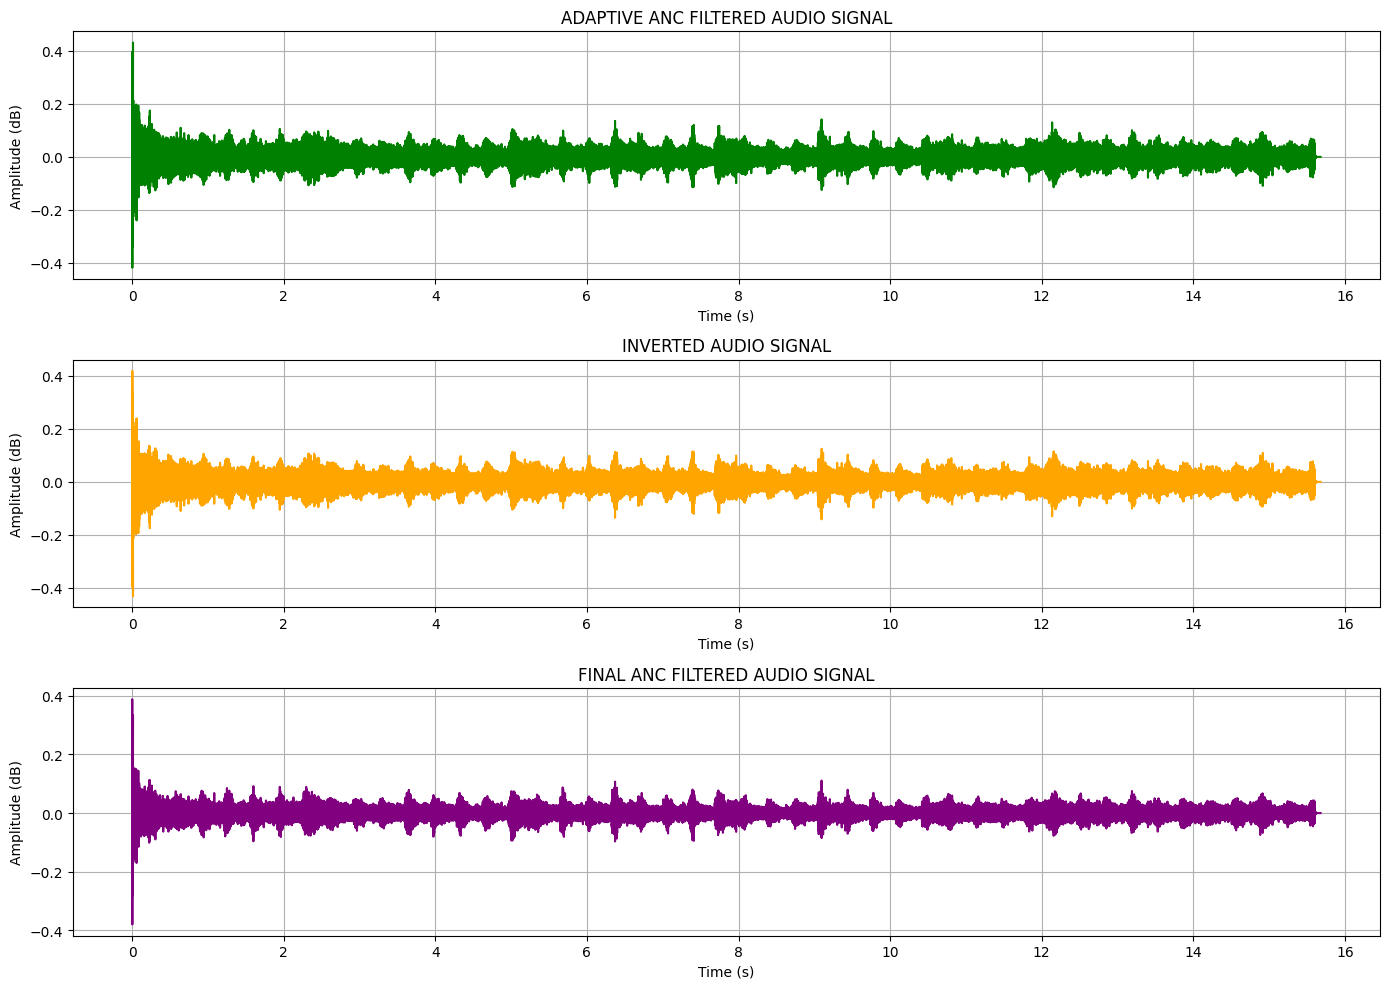


Iteration 2/5
Final ANC output saved to /content/anc_output_iteration_2.mp3


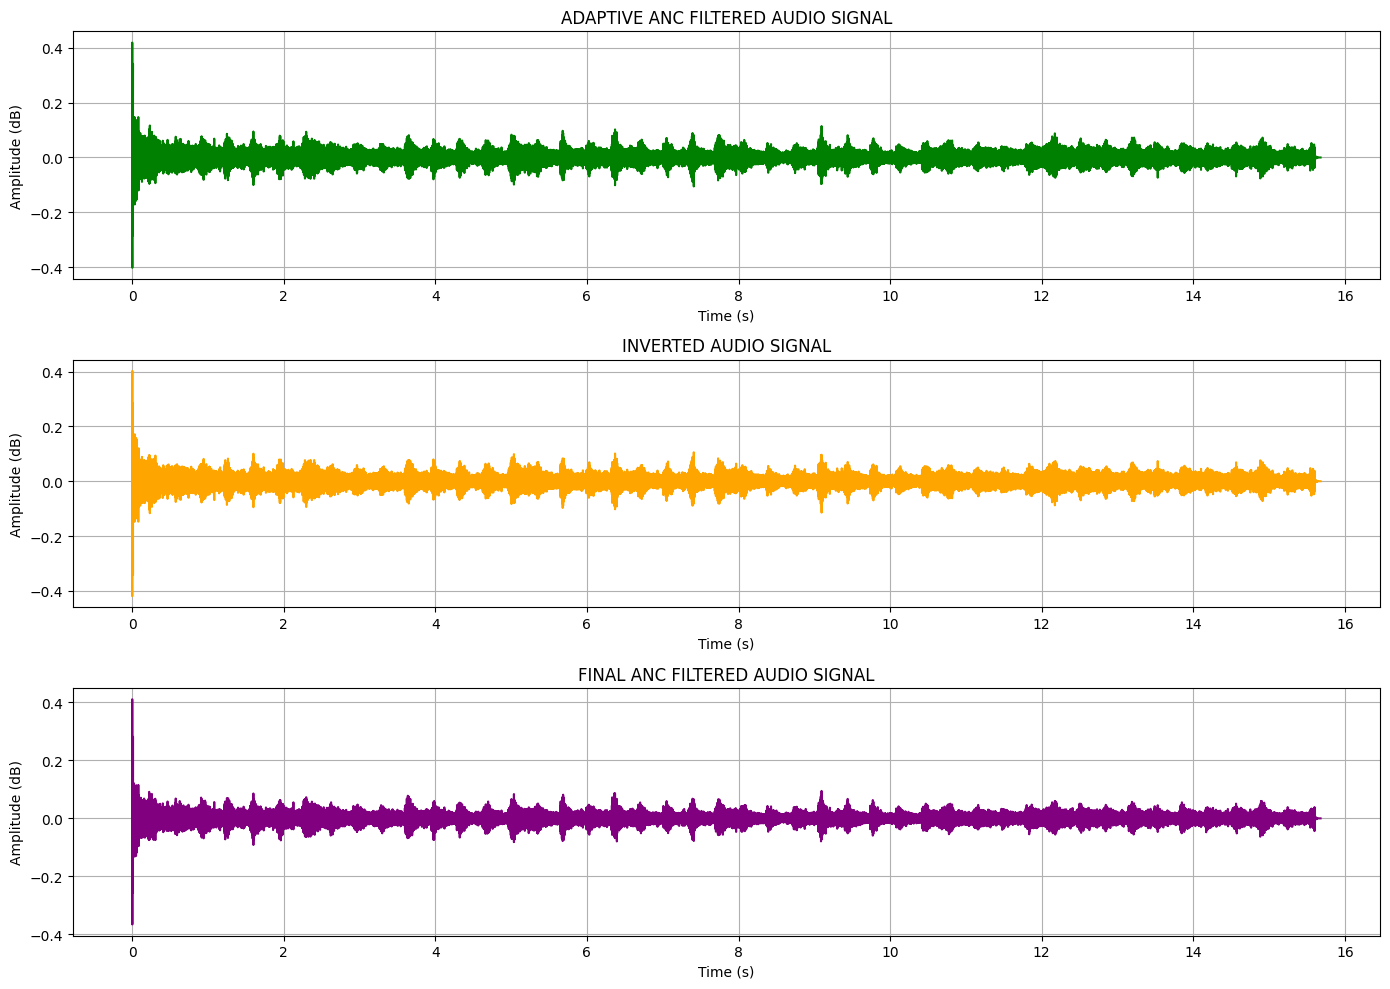


Iteration 3/5
Final ANC output saved to /content/anc_output_iteration_3.mp3


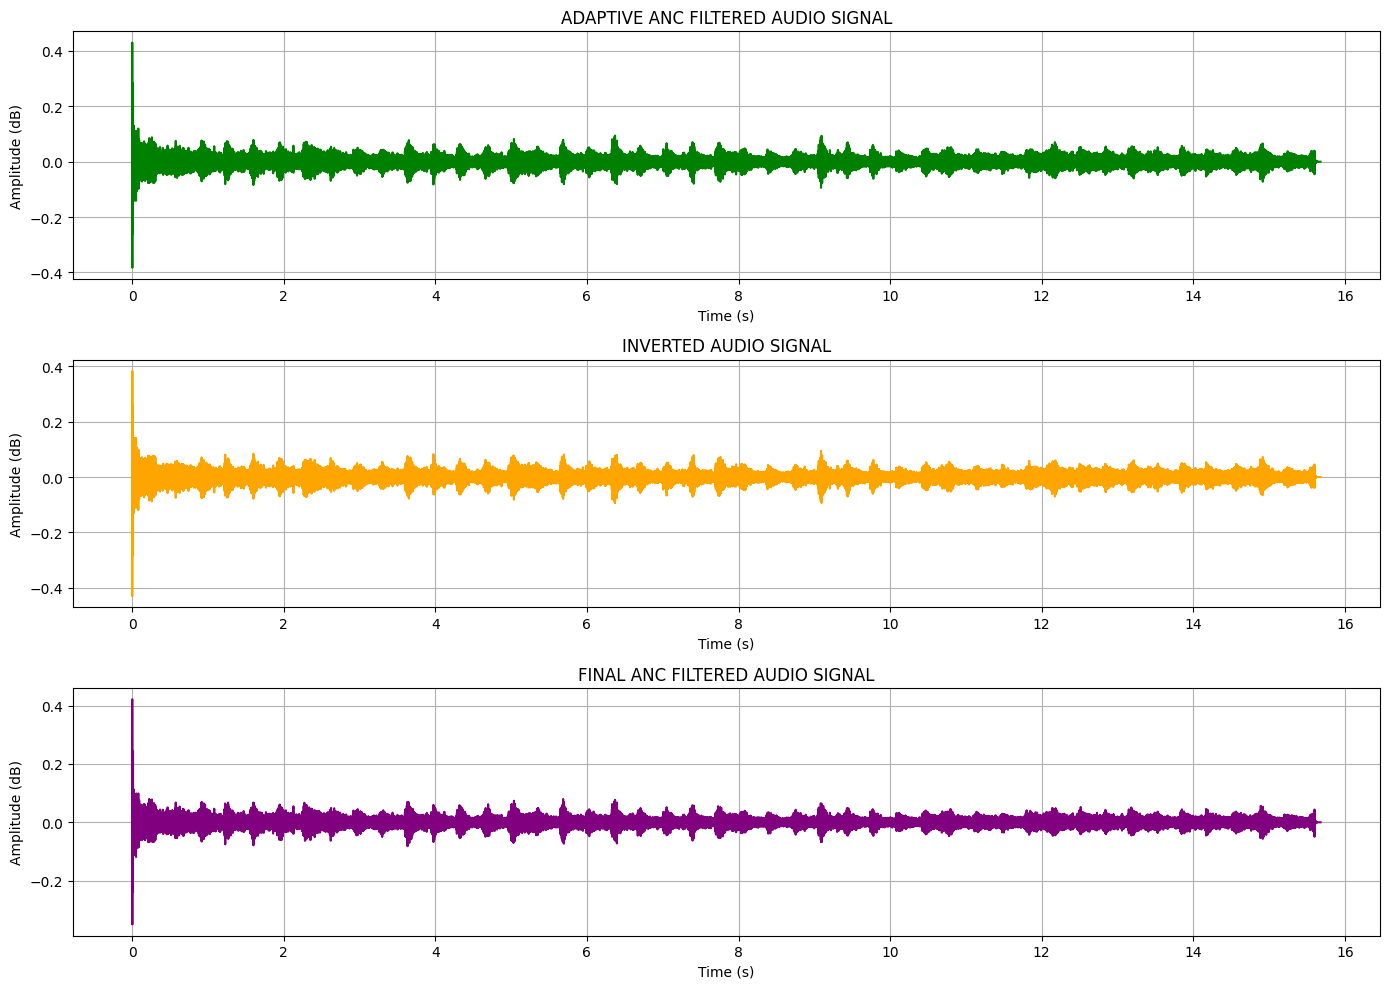


Iteration 4/5
Final ANC output saved to /content/anc_output_iteration_4.mp3


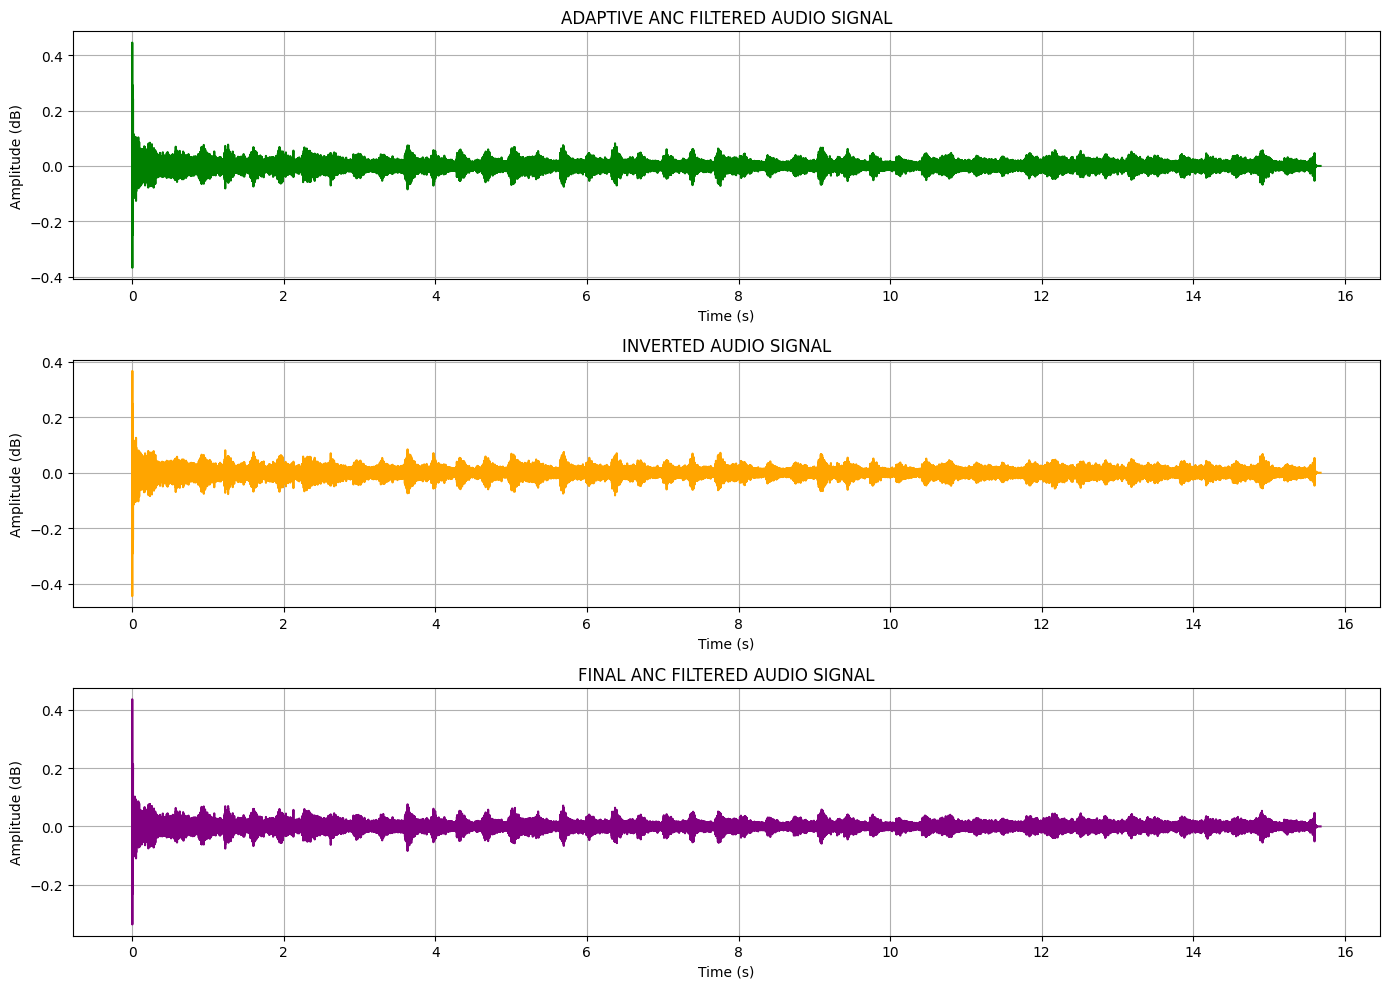


Iteration 5/5
Final ANC output saved to /content/anc_output_iteration_5.mp3


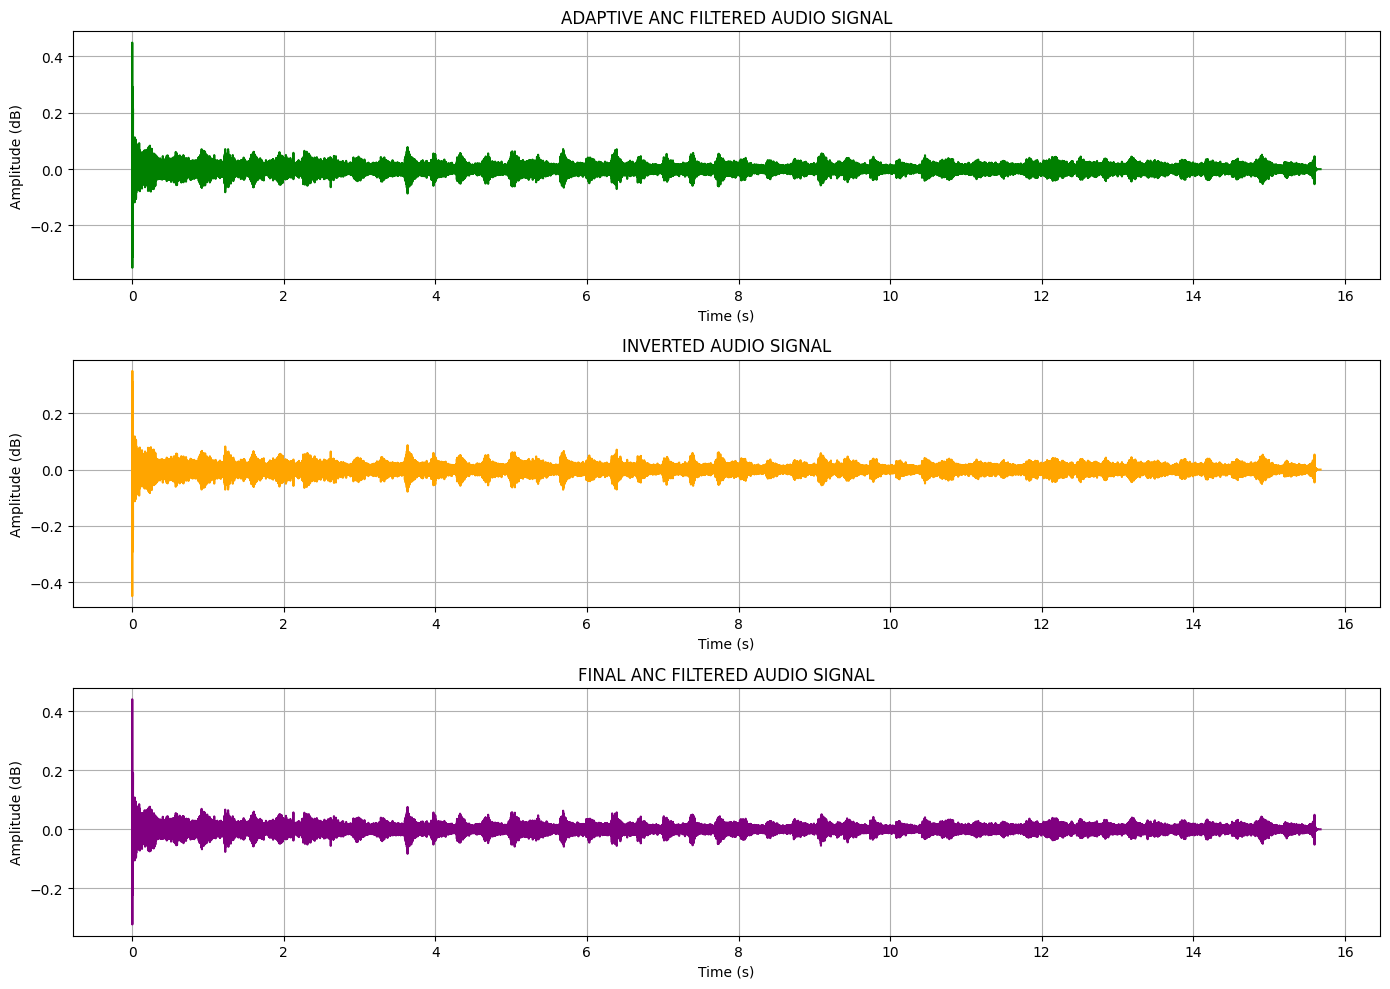


Final output saved as: /content/anc_output_iteration_5.mp3


In [ ]:
initial_audio_path = "/content/adaptive_anc.mp3"
final_output_path = "/content/anc_final_output.mp3"

final_anc_output = iterative_anc(initial_audio_path, final_output_path, num_iterations=5, feedback_rate=0.98)

In [ ]:
final_anc_signal, sr = sf.read(final_anc_output)

if len(final_anc_signal.shape) > 1:
    final_anc_signal = final_anc_signal[:, 0]

### **Performance Metric for Adaptive ANC filter:**

1. **Signal-to-Noise Ratio (SNR):**

In [ ]:
def calculate_snr(original, filtered):
    signal_power = np.mean(original**2)
    noise_power = np.mean((original - filtered)**2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

snr = calculate_snr(audio_signal, final_anc_signal)
print(f"Signal-to-Noise Ratio (SNR): {snr:.2f} dB")

Signal-to-Noise Ratio (SNR): 0.03 dB


2. **Dynamic Range:**

In [ ]:
def calculate_dynamic_range(signal):
    max_amplitude = np.max(np.abs(signal))
    min_amplitude = np.min(np.abs(signal[signal > 0]))
    dynamic_range = 20 * np.log10(max_amplitude / min_amplitude)
    return dynamic_range

dynamic_range = calculate_dynamic_range(final_anc_signal)
print(f"Dynamic Range: {dynamic_range:.2f} dB")

Dynamic Range: 211.68 dB


3. **Peak Signal-to-Noise Ratio (PSNR):**

In [ ]:
def calculate_psnr(original, filtered):
    mse = np.mean((original - filtered)**2)
    max_signal = np.max(np.abs(original))
    psnr = 10 * np.log10(np.max(original**2) / mse)
    return psnr

audio_signal_normalized = audio_signal / np.max(np.abs(audio_signal))
final_anc_signal_normalized = final_anc_signal / np.max(np.abs(final_anc_signal))

psnr = calculate_psnr(audio_signal_normalized, final_anc_signal_normalized)
print(f"Peak Signal-to-Noise Ratio (PSNR): {psnr:.2f} dB")

Peak Signal-to-Noise Ratio (PSNR): 13.77 dB


4. **Perceptual Evaluation of Audio Quality (PEAQ)** -> Failed building wheel for pypesq.

5. **Loudness Range (LRA):**

In [ ]:
def calculate_loudness_range(signal):
    short_term_loudness = np.sqrt(np.mean(signal**2))
    long_term_loudness = np.mean(np.abs(signal))
    lra = 20 * np.log10(short_term_loudness / long_term_loudness)
    return lra

lra = calculate_loudness_range(final_anc_signal)
print(f"Loudness Range (LRA): {lra:.2f} dB")

Loudness Range (LRA): 3.04 dB


6. **Frequency Response:**

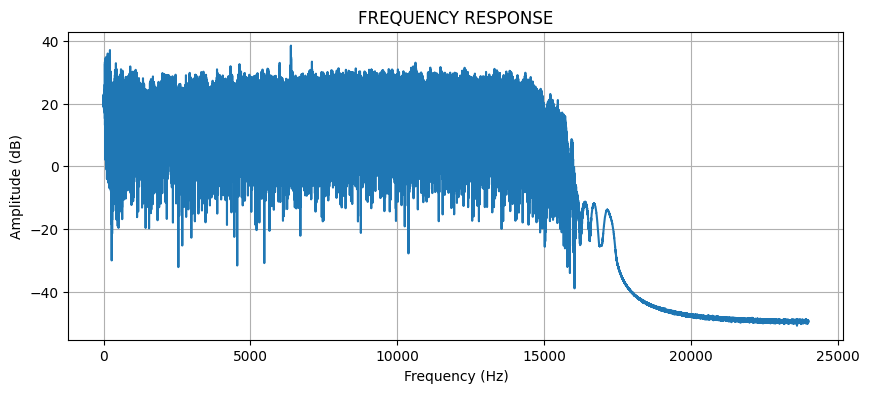

In [ ]:
def plot_frequency_response(signal, sr):
    n = len(signal)

    frequency = fftfreq(n, d=1/sr)[:n//2]
    amplitude = np.abs(fft(signal))[:n//2]

    plt.figure(figsize=(10, 4))
    plt.plot(frequency, 20 * np.log10(amplitude))
    plt.title("FREQUENCY RESPONSE")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude (dB)")
    plt.grid()
    plt.show()

plot_frequency_response(final_anc_signal, sr)

7. **Clipping of Headroom:**

In [ ]:
def calculate_clipping(signal):
    max_amplitude = np.max(np.abs(signal))
    headroom = 1.0 - max_amplitude
    return headroom, max_amplitude > 1.0

headroom, is_clipped = calculate_clipping(final_anc_signal)
print(f"Headroom: {headroom:.2f}")
print(f"Clipping Detected: {'Yes' if is_clipped else 'No'}")

Headroom: 0.55
Clipping Detected: No


8. **Weighted Noise Metric:**

In [ ]:
def calculate_weighted_noise(original, filtered, weight=0.8):
    noise = original - filtered
    weighted_noise = weight * np.mean(noise**2)
    return weighted_noise

weighted_noise_metric = calculate_weighted_noise(audio_signal, final_anc_signal)
print(f"Weighted Noise Metric: {weighted_noise_metric:.6f}")

Weighted Noise Metric: 0.017693
